# permission

In [1]:
import pandas as pd
from sklearn.utils import resample

In [2]:
drebin_data = pd.read_csv("drebin215dataset5560malware9476benign.csv")
drebin_data

C:\Users\aravi\AppData\Local\Temp\ipykernel_15800\3408213217.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  drebin_data = pd.read_csv("drebin215dataset5560malware9476benign.csv")


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [3]:
missing_val_drebin = drebin_data.isnull().sum()
missing_val_drebin

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [4]:
independent = drebin_data.iloc[:,:-1].values
independent

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=object)

In [5]:
dependent = drebin_data.iloc[:,-1].values
dependent

array(['S', 'S', 'S', ..., 'B', 'B', 'B'], dtype=object)

In [6]:
Permission_dataset = ['SEND_SMS'
,'READ_PHONE_STATE'
,'GET_ACCOUNTS'
,'RECEIVE_SMS'
,'READ_SMS'
,'getCallingUid'
,'USE_CREDENTIALS'
,'MANAGE_ACCOUNTS'
,'WRITE_SMS'
,'READ_SYNC_SETTINGS'
,'AUTHENTICATE_ACCOUNTS'
,'WRITE_HISTORY_BOOKMARKS'
,'TelephonyManager.getSubscriberId'
,'INSTALL_PACKAGES'
,'CAMERA'
,'WRITE_SYNC_SETTINGS'
,'READ_HISTORY_BOOKMARKS'
,'INTERNET'
,'android.intent.action.PACKAGE_REPLACED'
,'Binder'
,'android.intent.action.SEND_MULTIPLE'
,'RECORD_AUDIO'
,'IBinder'
,'createSubprocess'
,'NFC'
,'ACCESS_LOCATION_EXTRA_COMMANDS'
,'URLClassLoader'
,'WRITE_APN_SETTINGS'
,'abortBroadcast'
,'BIND_REMOTEVIEWS'
,'android.intent.action.TIME_SET'
,'READ_PROFILE'
,'TelephonyManager.getDeviceId'
,'MODIFY_AUDIO_SETTINGS'
,'getCallingPid'
,'READ_SYNC_STATS'
,'BROADCAST_STICKY'
,'android.intent.action.PACKAGE_REMOVED'
,'android.intent.action.TIMEZONE_CHANGED'
,'WAKE_LOCK'
,'RECEIVE_BOOT_COMPLETED'
,'RESTART_PACKAGES'
,'Ljava.lang.Class.getPackage'
,'chmod'
,'Ljava.lang.Class.getDeclaredClasses'
,'android.intent.action.ACTION_POWER_DISCONNECTED'
,'android.intent.action.PACKAGE_ADDED'
,'PathClassLoader'
,'TelephonyManager.getSimSerialNumber'
,'Runtime.load'
,'TelephonyManager.getCallState'
,'BLUETOOTH'
,'READ_CALENDAR'
,'READ_CALL_LOG'
,'SUBSCRIBED_FEEDS_WRITE'
,'READ_EXTERNAL_STORAGE'
,'sendMultipartTextMessage'
,'PackageInstaller'
,'VIBRATE'
,'remount'
,'android.intent.action.ACTION_SHUTDOWN'
,'sendDataMessage'
,'ACCESS_NETWORK_STATE'
,'chown'
,'HttpPost.init'
,'Ljava.lang.Class.getClasses'
,'SUBSCRIBED_FEEDS_READ'
,'TelephonyManager.isNetworkRoaming'
,'CHANGE_WIFI_MULTICAST_STATE'
,'WRITE_CALENDAR'
,'android.intent.action.PACKAGE_DATA_CLEARED'
,'MASTER_CLEAR'
,'HttpUriRequest'
,'UPDATE_DEVICE_STATS'
,'WRITE_CALL_LOG'
,'DELETE_PACKAGES'
,'GET_TASKS'
,'GLOBAL_SEARCH'
,'DELETE_CACHE_FILES'
,'WRITE_USER_DICTIONARY'
,'android.intent.action.PACKAGE_CHANGED'
,'android.intent.action.NEW_OUTGOING_CALL'
,'REORDER_TASKS'
,'WRITE_PROFILE'
,'SET_WALLPAPER'
,'BIND_INPUT_METHOD'
,'divideMessage'
,'READ_SOCIAL_STREAM'
,'READ_USER_DICTIONARY'
,'PROCESS_OUTGOING_CALLS'
,'CALL_PRIVILEGED'
,'Runtime.exec'
,'BIND_WALLPAPER'
,'RECEIVE_WAP_PUSH'
,'DUMP'
,'BATTERY_STATS'
,'ACCESS_COARSE_LOCATION'
,'SET_TIME'
,'android.intent.action.SENDTO'
,'WRITE_SOCIAL_STREAM'
,'WRITE_SETTINGS'
,'REBOOT'
,'BLUETOOTH_ADMIN'
,'TelephonyManager.getNetworkOperator'
,'/system/bin'
,'MessengerService'
,'BIND_DEVICE_ADMIN'
,'WRITE_GSERVICES'
,'class']
Permission_dataset =  drebin_data[Permission_dataset]

Permission_dataset

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,class
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,S
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15033,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15034,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,B


In [7]:
Permission_dataset.head(10)

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,class
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,S
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
5,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,S
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,S
7,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,S
8,1,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,S
9,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,S


In [8]:
Permission_dataset.tail(10)

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,class
15026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
15027,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,B
15028,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,B
15029,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,B
15030,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,B
15031,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15033,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15034,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,B
15035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,B


In [9]:
malware_samples_permission = Permission_dataset[Permission_dataset['class'] == 'S']
malware_samples_permission

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,class
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,S
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,S
5556,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
5557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,S
5558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S


In [10]:
benign_samples_permission = Permission_dataset[Permission_dataset['class'] == 'B']
benign_samples_permission

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,class
5560,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,B
5561,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,B
5562,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
5564,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15033,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15034,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,B


In [11]:
min_class_size = min(len(malware_samples_permission), len(benign_samples_permission))
min_class_size

5560

In [12]:
malware_samples_resampled_permission = resample(malware_samples_permission, replace=False, n_samples=min_class_size, random_state=42)
benign_samples_resampled_permission = resample(benign_samples_permission, replace=False, n_samples=min_class_size, random_state=42)

In [13]:
df_resampled_permission = pd.concat([malware_samples_resampled_permission, benign_samples_resampled_permission])

In [14]:
df_resampled_permission

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,class
625,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,S
4023,1,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,S
1822,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
3592,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,S
3706,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13637,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,B
12063,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,B
13815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
6662,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [15]:
unique_values = df_resampled_permission['class'].unique()
print(unique_values)

['S' 'B']


In [16]:
print(df_resampled_permission)

       SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
625           0                 1             0            0         0   
4023          1                 1             0            1         1   
1822          1                 1             0            0         0   
3592          0                 1             0            0         0   
3706          1                 1             0            1         0   
...         ...               ...           ...          ...       ...   
13637         0                 0             1            0         0   
12063         0                 1             1            0         0   
13815         0                 0             0            0         0   
6662          0                 1             0            0         0   
8836          0                 1             1            0         0   

       getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  \
625                0                0     

In [17]:
df_without_class = df_resampled_permission.drop(columns=['class'])
print(df_without_class.head())

      SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
625          0                 1             0            0         0   
4023         1                 1             0            1         1   
1822         1                 1             0            0         0   
3592         0                 1             0            0         0   
3706         1                 1             0            1         0   

      getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  \
625               0                0                0          0   
4023              0                0                0          1   
1822              0                0                0          0   
3592              0                0                0          0   
3706              0                0                0          0   

      READ_SYNC_SETTINGS  ...  android.intent.action.SENDTO  \
625                    0  ...                             0   
4023                   0  

In [18]:
from mlxtend.frequent_patterns import fpgrowth
#minimum support threshold
min_support = 0.1
frequent_itemsets = fpgrowth(df_without_class, min_support=min_support, use_colnames=True)
print(frequent_itemsets)

C:\Users\aravi\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


        support                                           itemsets
0      0.769335                                           (Binder)
1      0.763309                                          (IBinder)
2      0.714568                             (ACCESS_NETWORK_STATE)
3      0.687500                                 (READ_PHONE_STATE)
4      0.639209                                   (HttpUriRequest)
...         ...                                                ...
10541  0.100450  (GET_ACCOUNTS, Binder, WAKE_LOCK, Runtime.exec...
10542  0.100450  (GET_ACCOUNTS, Binder, INTERNET, WAKE_LOCK, Ru...
10543  0.100000  (GET_ACCOUNTS, INTERNET, ACCESS_NETWORK_STATE,...
10544  0.100000  (GET_ACCOUNTS, Binder, ACCESS_NETWORK_STATE, W...
10545  0.100000  (GET_ACCOUNTS, Binder, INTERNET, WAKE_LOCK, AC...

[10546 rows x 2 columns]


In [19]:

sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

top_50_patterns = sorted_frequent_itemsets.head(50)
top_75_patterns = sorted_frequent_itemsets.head(75)
top_100_patterns = sorted_frequent_itemsets.head(100)
top_150_patterns = sorted_frequent_itemsets.head(150)



In [20]:
top_50_patterns

,support,itemsets
16,0.891727,(INTERNET)
0,0.769335,(Binder)
1,0.763309,(IBinder)
30,0.763309,"(Binder, IBinder)"
29,0.721403,"(Binder, INTERNET)"
32,0.716637,"(Binder, INTERNET, IBinder)"
31,0.716637,"(INTERNET, IBinder)"
2,0.714568,(ACCESS_NETWORK_STATE)
35,0.708273,"(INTERNET, ACCESS_NETWORK_STATE)"
3,0.687500,(READ_PHONE_STATE)


In [21]:
top_75_patterns

,support,itemsets
16,0.891727,(INTERNET)
0,0.769335,(Binder)
1,0.763309,(IBinder)
30,0.763309,"(Binder, IBinder)"
29,0.721403,"(Binder, INTERNET)"
...,...,...
8,0.466906,(WAKE_LOCK)
170,0.466097,"(INTERNET, IBinder, HttpPost.init)"
181,0.466097,"(Binder, INTERNET, IBinder, HttpPost.init)"
168,0.466007,"(IBinder, HttpUriRequest, HttpPost.init)"


In [22]:
top_100_patterns

,support,itemsets
16,0.891727,(INTERNET)
0,0.769335,(Binder)
1,0.763309,(IBinder)
30,0.763309,"(Binder, IBinder)"
29,0.721403,"(Binder, INTERNET)"
...,...,...
97,0.439568,"(Binder, TelephonyManager.getDeviceId, READ_PH..."
161,0.438579,"(Binder, ACCESS_NETWORK_STATE, HttpPost.init)"
165,0.438399,"(Binder, INTERNET, ACCESS_NETWORK_STATE, HttpP..."
101,0.437500,"(Binder, TelephonyManager.getDeviceId, READ_PH..."


In [23]:
top_150_patterns

,support,itemsets
16,0.891727,(INTERNET)
0,0.769335,(Binder)
1,0.763309,(IBinder)
30,0.763309,"(Binder, IBinder)"
29,0.721403,"(Binder, INTERNET)"
...,...,...
127,0.387500,"(Binder, TelephonyManager.getDeviceId, HttpUri..."
6548,0.387410,"(INTERNET, RECEIVE_BOOT_COMPLETED)"
546,0.387320,"(INTERNET, ACCESS_NETWORK_STATE, WAKE_LOCK)"
72,0.387140,"(READ_PHONE_STATE, Binder, HttpUriRequest)"


In [24]:
from mlxtend.frequent_patterns import association_rules
#association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [25]:
# Sort frequent itemsets by support in descending order
top_combinations = frequent_itemsets.sort_values(by='support', ascending=False).head(150)
print(top_combinations)

       support                                           itemsets
16    0.891727                                         (INTERNET)
0     0.769335                                           (Binder)
1     0.763309                                          (IBinder)
30    0.763309                                  (Binder, IBinder)
29    0.721403                                 (Binder, INTERNET)
...        ...                                                ...
127   0.387500  (Binder, TelephonyManager.getDeviceId, HttpUri...
6548  0.387410                 (INTERNET, RECEIVE_BOOT_COMPLETED)
546   0.387320        (INTERNET, ACCESS_NETWORK_STATE, WAKE_LOCK)
72    0.387140         (READ_PHONE_STATE, Binder, HttpUriRequest)
133   0.387050  (Binder, INTERNET, TelephonyManager.getDeviceI...

[150 rows x 2 columns]


In [26]:
# Iterate through the top combinations and check for their presence in each app
for combination in top_combinations['itemsets']:
    combination_name = ', '.join(combination)
    df_resampled_permission[combination_name] = df_resampled_permission.apply(
        lambda row: 1 if all(row[item] == 1 for item in combination) else 0, axis=1
    )

# Now your dataset should have additional columns for each combination, indicating their presence (1) or absence (0) in each app.


In [27]:

# The code below will create a new DataFrame specifically for the co-existence dataset

# Select the columns related to combinations (exclude the 'class' column)
combination_columns = [col for col in df_resampled_permission.columns if col != 'class']

# Create a new DataFrame for the co-existence dataset
co_existence_dataset = df_resampled_permission[combination_columns]

# Add the 'class' column back to the co-existence
co_existence_dataset['class'] = df_resampled_permission['class']

# Print or save the co-existence dataset
print(co_existence_dataset)


       SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
625           0                 1             0            0         0   
4023          1                 1             0            1         1   
1822          1                 1             0            0         0   
3592          0                 1             0            0         0   
3706          1                 1             0            1         0   
...         ...               ...           ...          ...       ...   
13637         0                 0             1            0         0   
12063         0                 1             1            0         0   
13815         0                 0             0            0         0   
6662          0                 1             0            0         0   
8836          0                 1             1            0         0   

       getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  \
625                0                0     

# SVM

# 150

In [30]:
#select columns  randomely
import random

#number of columns to select
num_columns_to_select = 150


all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_150 = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_150)

# Print a classification report for more detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
SVM Accuracy: 0.9321043165467626
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.94      0.93      1112
           S       0.94      0.92      0.93      1112

    accuracy                           0.93      2224
   macro avg       0.93      0.93      0.93      2224
weighted avg       0.93      0.93      0.93      2224



# 100

In [29]:
import random

#number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split


X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_100 = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_100)

#more detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
SVM Accuracy: 0.9087230215827338
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.89      0.94      0.91      1112
           S       0.93      0.88      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.91      0.91      0.91      2224
weighted avg       0.91      0.91      0.91      2224



# 75

In [30]:
import random

num_columns_to_select = 75

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_75 = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_75)

# Print a classification report for more detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
SVM Accuracy: 0.914568345323741
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.89      0.94      0.92      1112
           S       0.94      0.88      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.92      0.91      0.91      2224
weighted avg       0.92      0.91      0.91      2224



# 50

In [31]:
import random

#number of columns to select 
num_columns_to_select = 50

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]


from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm_50 = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_50)

report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)

Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
SVM Accuracy: 0.8785971223021583
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.84      0.87      1112
           S       0.85      0.92      0.88      1112

    accuracy                           0.88      2224
   macro avg       0.88      0.88      0.88      2224
weighted avg       0.88      0.88      0.88      2224



# Randome forest

In [34]:
import random

#number of columns to select 
num_columns_to_select = 150

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]


selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split


X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, Y_train)

Y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf_150 = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_150)

report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
Random Forest Accuracy: 0.9644784172661871
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.97      0.96      1112
           S       0.97      0.96      0.96      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [ ]:
import random

num_columns_to_select = 100

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, Y_train)

Y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf_100 = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_100)

report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)

In [34]:
import random

num_columns_to_select = 75

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, Y_train)

Y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf_75 = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_75)

report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
Random Forest Accuracy: 0.9285071942446043
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.90      0.96      0.93      1112
           S       0.96      0.90      0.93      1112

    accuracy                           0.93      2224
   macro avg       0.93      0.93      0.93      2224
weighted avg       0.93      0.93      0.93      2224



In [35]:
import random

num_columns_to_select = 50

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, Y_train)

Y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf_50 = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_50)

report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
Random Forest Accuracy: 0.9348021582733813
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.95      0.94      1112
           S       0.94      0.92      0.93      1112

    accuracy                           0.93      2224
   macro avg       0.93      0.93      0.93      2224
weighted avg       0.93      0.93      0.93      2224



# Desicion tree

In [36]:
import random

num_columns_to_select = 150

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, Y_train)

Y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt_150 = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_150)

report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
Decision Tree Accuracy: 0.9392985611510791
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.96      0.94      1112
           S       0.95      0.92      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



In [37]:
import random

# Define the number of columns to select (150 in your case)
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_100 = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_100)

# Print a classification report for more detailed metrics
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
Decision Tree Accuracy: 0.9460431654676259
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.95      0.95      1112
           S       0.95      0.95      0.95      1112

    accuracy                           0.95      2224
   macro avg       0.95      0.95      0.95      2224
weighted avg       0.95      0.95      0.95      2224



In [38]:
import random

num_columns_to_select = 75

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']


random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, Y_train)

Y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt_75 = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_75)

report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
Decision Tree Accuracy: 0.9019784172661871
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.89      0.91      0.90      1112
           S       0.91      0.89      0.90      1112

    accuracy                           0.90      2224
   macro avg       0.90      0.90      0.90      2224
weighted avg       0.90      0.90      0.90      2224



In [39]:
import random

num_columns_to_select = 50

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, Y_train)

Y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt_50 = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_50)

report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
Decision Tree Accuracy: 0.8754496402877698
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.87      0.89      0.88      1112
           S       0.89      0.86      0.87      1112

    accuracy                           0.88      2224
   macro avg       0.88      0.88      0.88      2224
weighted avg       0.88      0.88      0.88      2224



# KNN

In [40]:
import random
num_columns_to_select = 150

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, Y_train)

Y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn_150 = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_150)

report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
KNN Accuracy: 0.9419964028776978
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.93      0.94      1112
           S       0.93      0.95      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



In [41]:
import random

# Define the number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_100 = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_100)

# Print a classification report for more detailed metrics
report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
KNN Accuracy: 0.9222122302158273
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.91      0.92      1112
           S       0.92      0.93      0.92      1112

    accuracy                           0.92      2224
   macro avg       0.92      0.92      0.92      2224
weighted avg       0.92      0.92      0.92      2224



In [42]:
import random

num_columns_to_select = 75

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, Y_train)

Y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_75 = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_75)

report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
KNN Accuracy: 0.9339028776978417
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.94      0.93      1112
           S       0.94      0.92      0.93      1112

    accuracy                           0.93      2224
   macro avg       0.93      0.93      0.93      2224
weighted avg       0.93      0.93      0.93      2224



In [43]:
# import random

num_columns_to_select = 50

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, Y_train)

Y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn_50 = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_50)

report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
KNN Accuracy: 0.8556654676258992
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.85      0.87      0.86      1112
           S       0.86      0.84      0.85      1112

    accuracy                           0.86      2224
   macro avg       0.86      0.86      0.86      2224
weighted avg       0.86      0.86      0.86      2224



# Logistic regression

In [44]:
import random
num_columns_to_select = 150

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=42)

logistic_classifier.fit(X_train, Y_train)

Y_pred_logistic = logistic_classifier.predict(X_test)

accuracy_logistic_150 = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_150)

report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
Logistic Regression Accuracy: 0.9226618705035972
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.92      0.92      1112
           S       0.92      0.92      0.92      1112

    accuracy                           0.92      2224
   macro avg       0.92      0.92      0.92      2224
weighted avg       0.92      0.92      0.92      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
import random

num_columns_to_select = 100

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=42)

logistic_classifier.fit(X_train, Y_train)

Y_pred_logistic = logistic_classifier.predict(X_test)

accuracy_logistic_100 = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_100)

report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
Logistic Regression Accuracy: 0.914568345323741
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.90      0.93      0.92      1112
           S       0.93      0.90      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.91      0.91      0.91      2224
weighted avg       0.91      0.91      0.91      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
import random

num_columns_to_select = 75

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=42)

logistic_classifier.fit(X_train, Y_train)

Y_pred_logistic = logistic_classifier.predict(X_test)

accuracy_logistic_75 = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_75)

report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)

Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
Logistic Regression Accuracy: 0.9199640287769785
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.92      0.92      1112
           S       0.92      0.92      0.92      1112

    accuracy                           0.92      2224
   macro avg       0.92      0.92      0.92      2224
weighted avg       0.92      0.92      0.92      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
import random

num_columns_to_select = 50

all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=42)

logistic_classifier.fit(X_train, Y_train)

Y_pred_logistic = logistic_classifier.predict(X_test)

accuracy_logistic_50 = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_50)

report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
Logistic Regression Accuracy: 0.8426258992805755
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.81      0.89      0.85      1112
           S       0.88      0.79      0.83      1112

    accuracy                           0.84      2224
   macro avg       0.85      0.84      0.84      2224
weighted avg       0.85      0.84      0.84      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


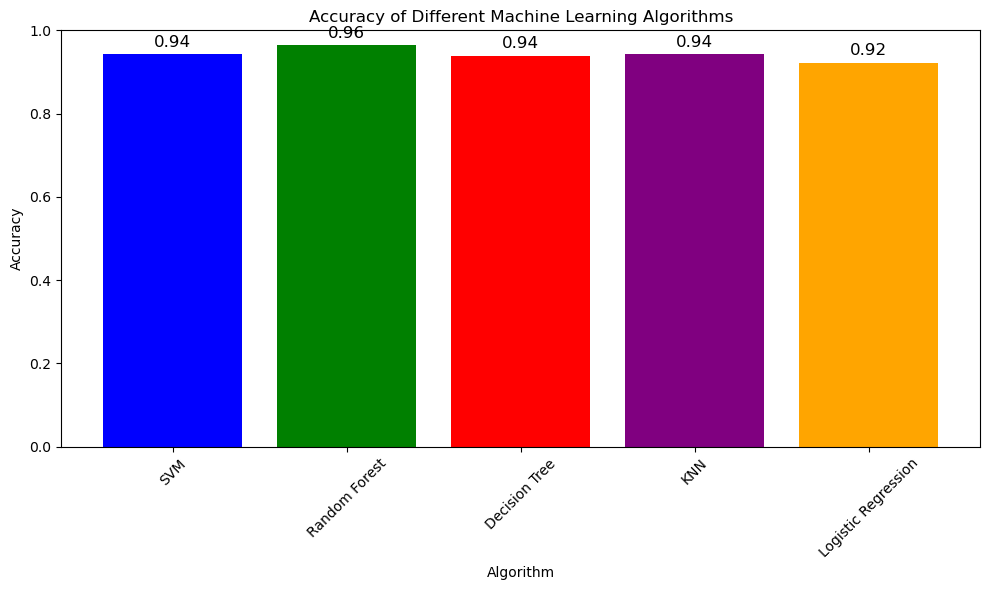

In [48]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

accuracies = [accuracy_svm_150, accuracy_rf_150, accuracy_dt_150,accuracy_knn_150, accuracy_logistic_150]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45) 

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


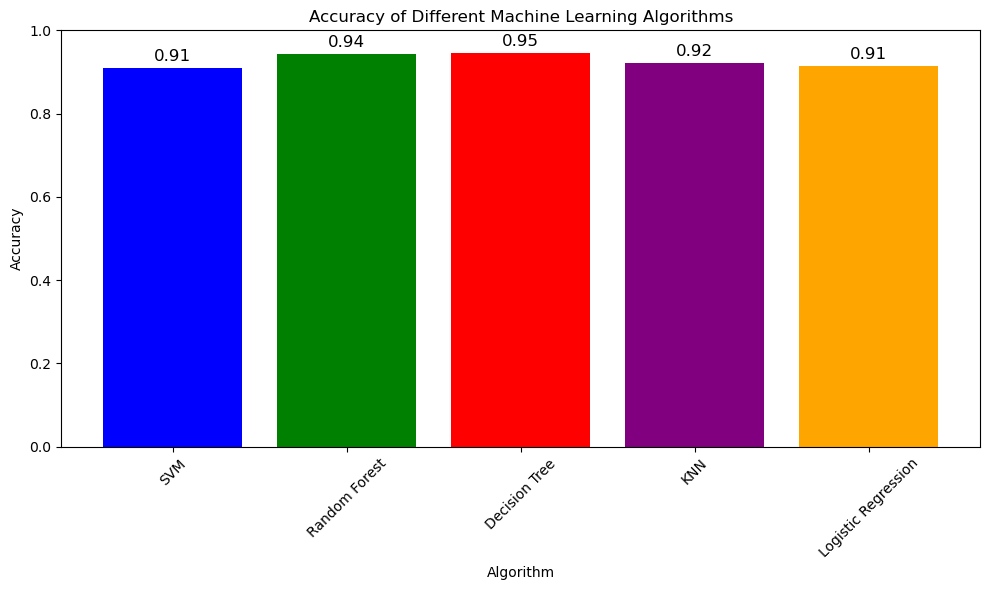

In [49]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

accuracies = [accuracy_svm_100, accuracy_rf_100, accuracy_dt_100, accuracy_knn_100, accuracy_logistic_100]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


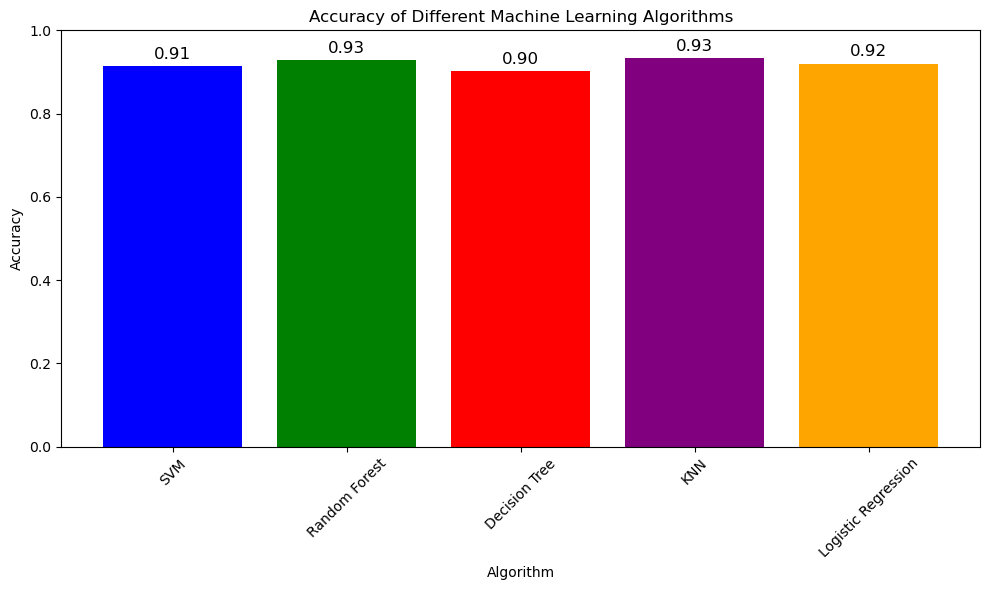

In [50]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

accuracies = [accuracy_svm_75, accuracy_rf_75, accuracy_dt_75, accuracy_knn_75, accuracy_logistic_75]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


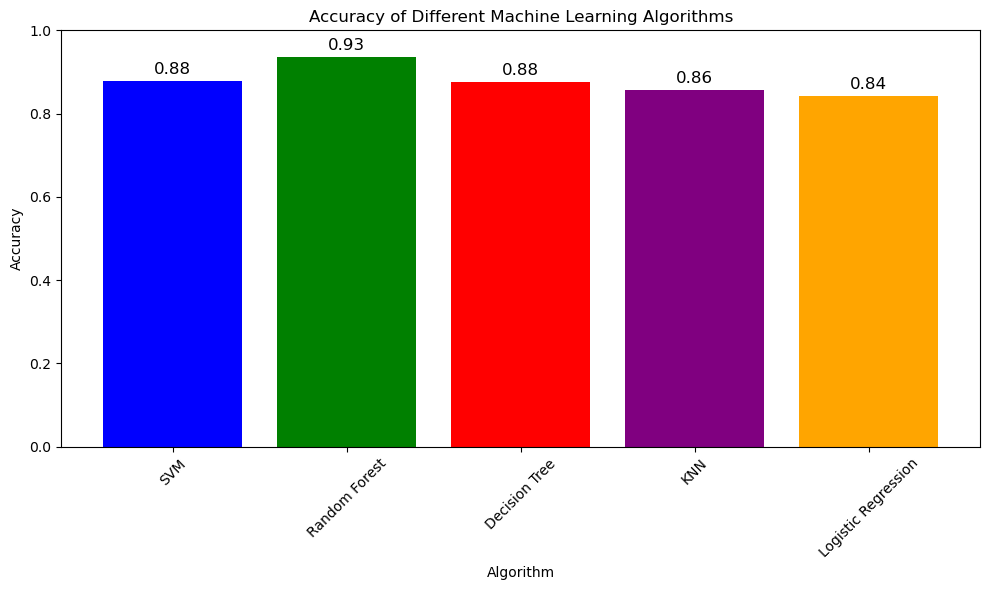

In [51]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

accuracies = [accuracy_svm_50, accuracy_rf_50, accuracy_dt_50, accuracy_knn_50, accuracy_logistic_50]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45) 

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# API calls

In [52]:
apicall_dataset = ['transact'
,'onServiceConnected'
,'bindService'
,'attachInterface'
,'ServiceConnection'
,'android.os.Binder'
,'Ljava.lang.Class.getCanonicalName'
,'Ljava.lang.Class.getMethods'
,'Ljava.lang.Class.cast'
,'Ljava.net.URLDecoder'
,'android.content.pm.Signature'
,'android.telephony.SmsManager'
,'Ljava.lang.Class.getField'
,'Landroid.content.Context.registerReceiver'
,'Ljava.lang.Class.getDeclaredField'
,'Ljava.lang.Class.getMethod'
,'System.loadLibrary'
,'android.intent.action.SEND'
,'Ljavax.crypto.Cipher'
,'WRITE_SMS'
,'READ_SYNC_SETTINGS'
,'AUTHENTICATE_ACCOUNTS'
,'android.telephony.gsm.SmsManager'
,'WRITE_HISTORY_BOOKMARKS'
,'TelephonyManager.getSubscriberId'
,'mount'
,'INSTALL_PACKAGES'
,'Runtime.getRuntime'
,'CAMERA'
,'Ljava.lang.Object.getClass'
,'WRITE_SYNC_SETTINGS'
,'READ_HISTORY_BOOKMARKS'
,'Ljava.lang.Class.forName'
,'INTERNET'
,'android.intent.action.PACKAGE_REPLACED'
,'Binder'
,'android.intent.action.SEND_MULTIPLE'
,'RECORD_AUDIO'
,'IBinder'
,'android.os.IBinder'
,'createSubprocess'
,'NFC'
,'ACCESS_LOCATION_EXTRA_COMMANDS'
,'URLClassLoader'
,'WRITE_APN_SETTINGS'
,'abortBroadcast'
,'BIND_REMOTEVIEWS'
,'android.intent.action.TIME_SET'
,'READ_PROFILE'
,'TelephonyManager.getDeviceId'
,'MODIFY_AUDIO_SETTINGS'
,'getCallingPid'
,'READ_SYNC_STATS'
,'BROADCAST_STICKY'
,'android.intent.action.PACKAGE_REMOVED'
,'android.intent.action.TIMEZONE_CHANGED'
,'WAKE_LOCK'
,'RECEIVE_BOOT_COMPLETED'
,'RESTART_PACKAGES'
,'Ljava.lang.Class.getPackage'
,'chmod'
,'Ljava.lang.Class.getDeclaredClasses'
,'android.intent.action.ACTION_POWER_DISCONNECTED'
,'android.intent.action.PACKAGE_ADDED'
,'PathClassLoader'
,'TelephonyManager.getSimSerialNumber'
,'Runtime.load'
,'TelephonyManager.getCallState'
,'BLUETOOTH'
,'READ_CALENDAR'
,'READ_CALL_LOG'
,'SUBSCRIBED_FEEDS_WRITE'
,'class']

apicall_dataset  =  drebin_data[apicall_dataset]

print(apicall_dataset)

       transact  onServiceConnected  bindService  attachInterface  \
0             0                   0            0                0   
1             0                   0            0                0   
2             0                   0            0                0   
3             0                   0            0                0   
4             0                   0            0                0   
...         ...                 ...          ...              ...   
15031         1                   1            1                1   
15032         0                   0            0                0   
15033         0                   0            0                0   
15034         1                   1            1                1   
15035         1                   1            1                1   

       ServiceConnection  android.os.Binder  \
0                      0                  0   
1                      0                  0   
2                      0      

In [53]:
malware_samples_apicall_dataset = apicall_dataset[apicall_dataset['class'] == 'S']
malware_samples_apicall_dataset

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,...,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,S
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
5556,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,S
5557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
5558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S


In [54]:
benign_samples_apicall_dataset = apicall_dataset[apicall_dataset['class'] == 'B']
benign_samples_apicall_dataset

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,...,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,class
5560,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,B
5561,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,B
5562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15034,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,B


In [55]:
min_class_size = min(len(malware_samples_apicall_dataset), len(benign_samples_apicall_dataset))
min_class_size

5560

In [56]:
malware_samples_resampled_apicall_dataset = resample(malware_samples_apicall_dataset, replace=False, n_samples=min_class_size, random_state=42)
benign_samples_resampled_apicall_dataset = resample(benign_samples_apicall_dataset, replace=False, n_samples=min_class_size, random_state=42)



In [57]:
df_resampled_apicall_dataset = pd.concat([malware_samples_resampled_apicall_dataset, benign_samples_resampled_apicall_dataset])

In [58]:
df_resampled_apicall_dataset

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,...,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,class
625,0,0,0,0,0,1,0,1,1,1,...,1,0,1,0,0,0,0,0,0,S
4023,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,S
1822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13637,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,B
12063,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,B
13815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
6662,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,B


In [59]:
# Assuming 'class' is a string column containing 'B' and 'S'

# Replace 'True' with 'B' and 'False' with 'S' in the 'class' column
df_resampled_apicall_dataset['class'] = df_resampled_apicall_dataset['class'].replace({True: 'B', False: 'S'})

# Check the data types again
print(df_resampled_apicall_dataset)


       transact  onServiceConnected  bindService  attachInterface  \
625           0                   0            0                0   
4023          0                   0            0                0   
1822          0                   0            0                0   
3592          0                   0            0                0   
3706          0                   0            0                0   
...         ...                 ...          ...              ...   
13637         0                   0            0                0   
12063         1                   1            1                1   
13815         0                   0            0                0   
6662          0                   0            0                0   
8836          1                   1            1                1   

       ServiceConnection  android.os.Binder  \
625                    0                  1   
4023                   0                  0   
1822                   0      

In [60]:
unique_values = df_resampled_apicall_dataset['class'].unique()
print(unique_values)

['S' 'B']


In [61]:
print(df_resampled_apicall_dataset)

       transact  onServiceConnected  bindService  attachInterface  \
625           0                   0            0                0   
4023          0                   0            0                0   
1822          0                   0            0                0   
3592          0                   0            0                0   
3706          0                   0            0                0   
...         ...                 ...          ...              ...   
13637         0                   0            0                0   
12063         1                   1            1                1   
13815         0                   0            0                0   
6662          0                   0            0                0   
8836          1                   1            1                1   

       ServiceConnection  android.os.Binder  \
625                    0                  1   
4023                   0                  0   
1822                   0      

In [62]:


# Drop the "class" column from the DataFrame
df_without_class_api = df_resampled_apicall_dataset.drop(columns=['class'])

# Verify that the "class" column is removed
print(df_without_class_api.head())



      transact  onServiceConnected  bindService  attachInterface  \
625          0                   0            0                0   
4023         0                   0            0                0   
1822         0                   0            0                0   
3592         0                   0            0                0   
3706         0                   0            0                0   

      ServiceConnection  android.os.Binder  Ljava.lang.Class.getCanonicalName  \
625                   0                  1                                  0   
4023                  0                  0                                  0   
1822                  0                  0                                  0   
3592                  0                  0                                  0   
3706                  0                  0                                  0   

      Ljava.lang.Class.getMethods  Ljava.lang.Class.cast  \
625                             1           

In [63]:
from mlxtend.frequent_patterns import fpgrowth

# Define the minimum support threshold (you can adjust this)
min_support = 0.3

# Apply FP-Growth to find frequent itemsets
frequent_itemsets_api = fpgrowth(df_without_class_api, min_support=min_support, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets_api)

C:\Users\aravi\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


       support                                           itemsets
0     0.769335                                           (Binder)
1     0.763309                                          (IBinder)
2     0.763219                               (android.os.IBinder)
3     0.702338                       (Ljava.lang.Object.getClass)
4     0.595953                         (Ljava.lang.Class.forName)
...        ...                                                ...
5149  0.300719  (android.os.IBinder, transact, attachInterface...
5150  0.300719  (transact, android.os.Binder, attachInterface,...
5151  0.300719  (transact, android.os.Binder, attachInterface,...
5152  0.300719  (android.os.IBinder, transact, android.os.Bind...
5153  0.300719  (android.os.IBinder, transact, android.os.Bind...

[5154 rows x 2 columns]


In [64]:
# Assuming 'frequent_itemsets' contains your FP-Growth results
sorted_frequent_itemsets_api = frequent_itemsets_api.sort_values(by='support', ascending=False)

# Select the top 50, 75, 100, and 150 frequent patterns
top_50_patterns_api = sorted_frequent_itemsets_api.head(50)
top_75_patterns_api = sorted_frequent_itemsets_api.head(75)
top_100_patterns_api = sorted_frequent_itemsets_api.head(100)
top_150_patterns_api = sorted_frequent_itemsets_api.head(150)



In [65]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules_api = association_rules(frequent_itemsets_api, metric="lift", min_threshold=1.0)

# Print and analyze the generated rules
print(rules_api)


                       antecedents  \
0                         (Binder)   
1                       (INTERNET)   
2                         (Binder)   
3                        (IBinder)   
4                        (IBinder)   
...                            ...   
288513         (android.os.Binder)   
288514           (attachInterface)   
288515                    (Binder)   
288516                   (IBinder)   
288517  (Ljava.lang.Class.forName)   

                                              consequents  antecedent support  \
0                                              (INTERNET)            0.769335   
1                                                (Binder)            0.891727   
2                                               (IBinder)            0.769335   
3                                                (Binder)            0.763309   
4                                              (INTERNET)            0.763309   
...                                                   ...

In [66]:
# Sort frequent itemsets by support in descending order
top_combinations_api = frequent_itemsets_api.sort_values(by='support', ascending=False).head(150)

# Print the top combinations
print(top_combinations_api)


      support                                           itemsets
18   0.891727                                         (INTERNET)
0    0.769335                                           (Binder)
1    0.763309                                          (IBinder)
26   0.763309                                  (Binder, IBinder)
29   0.763219                      (android.os.IBinder, IBinder)
..        ...                                                ...
306  0.457284  (Ljava.lang.Object.getClass, Ljava.lang.Class....
283  0.454586  (Ljava.lang.Object.getClass, Binder, Ljava.lan...
9    0.452518        (Landroid.content.Context.registerReceiver)
302  0.451349  (Ljava.lang.Class.getMethod, IBinder, INTERNET...
298  0.451349  (Ljava.lang.Object.getClass, Ljava.lang.Class....

[150 rows x 2 columns]


In [67]:
for combination in top_combinations_api['itemsets']:
    combination_name_api = ', '.join(combination)
    df_resampled_apicall_dataset[combination_name_api] = df_resampled_apicall_dataset.apply(
        lambda row: 1 if all(row[item] == 1 for item in combination) else 0, axis=1
    )

In [68]:
# Select the columns related to combinations (exclude the 'class' column)
combination_columns = [col for col in df_resampled_apicall_dataset.columns if col != 'class']

# Create a new DataFrame for the co-existence dataset
co_existence_dataset = df_resampled_apicall_dataset[combination_columns]

# Add the 'class' column back to the co-existence dataset if needed
co_existence_dataset['class'] = df_resampled_apicall_dataset['class']

# Print or save the co-existence dataset
print(co_existence_dataset)




       transact  onServiceConnected  bindService  attachInterface  \
625           0                   0            0                0   
4023          0                   0            0                0   
1822          0                   0            0                0   
3592          0                   0            0                0   
3706          0                   0            0                0   
...         ...                 ...          ...              ...   
13637         0                   0            0                0   
12063         1                   1            1                1   
13815         0                   0            0                0   
6662          0                   0            0                0   
8836          1                   1            1                1   

       ServiceConnection  android.os.Binder  \
625                    0                  1   
4023                   0                  0   
1822                   0      

# svm

In [69]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_150_api = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_150_api)

# Print a classification report for more detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
SVM Accuracy: 0.9518884892086331
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.95      1112
           S       0.96      0.94      0.95      1112

    accuracy                           0.95      2224
   macro avg       0.95      0.95      0.95      2224
weighted avg       0.95      0.95      0.95      2224



In [70]:
import random

# Number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_100_api = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_100_api)

# More detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
SVM Accuracy: 0.9064748201438849
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.86      0.90      1112
           S       0.87      0.95      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.91      0.91      0.91      2224
weighted avg       0.91      0.91      0.91      2224



In [71]:
import random

# Number of columns to select 
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_75_api = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_75_api)

# More detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
SVM Accuracy: 0.9267086330935251
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.95      0.93      1112
           S       0.94      0.91      0.93      1112

    accuracy                           0.93      2224
   macro avg       0.93      0.93      0.93      2224
weighted avg       0.93      0.93      0.93      2224



In [72]:
import random

# Number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_50_api = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_50_api)

# More detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
SVM Accuracy: 0.8358812949640287
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.86      0.80      0.83      1112
           S       0.81      0.87      0.84      1112

    accuracy                           0.84      2224
   macro avg       0.84      0.84      0.84      2224
weighted avg       0.84      0.84      0.84      2224



# Random forest

In [73]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_150_api = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_150_api)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
Random Forest Accuracy: 0.9613309352517986
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96      1112
           S       0.96      0.96      0.96      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [74]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_100_api = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_100_api)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
Random Forest Accuracy: 0.9424460431654677
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.95      0.94      1112
           S       0.95      0.93      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



In [75]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_75_api = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_75_api)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
Random Forest Accuracy: 0.9487410071942446
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.94      0.95      1112
           S       0.94      0.96      0.95      1112

    accuracy                           0.95      2224
   macro avg       0.95      0.95      0.95      2224
weighted avg       0.95      0.95      0.95      2224



In [76]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_50_api = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_50_api)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
Random Forest Accuracy: 0.9199640287769785
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.92      0.92      1112
           S       0.92      0.92      0.92      1112

    accuracy                           0.92      2224
   macro avg       0.92      0.92      0.92      2224
weighted avg       0.92      0.92      0.92      2224



# Decision tree

In [77]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_150_api = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_150_api)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
Decision Tree Accuracy: 0.9442446043165468
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.94      0.94      1112
           S       0.94      0.95      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



In [78]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_100_api = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_100_api)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
Decision Tree Accuracy: 0.9428956834532374
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.93      0.94      1112
           S       0.94      0.95      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



In [79]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_75_api = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_75_api)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
Decision Tree Accuracy: 0.9105215827338129
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.86      0.91      1112
           S       0.88      0.96      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.91      0.91      0.91      2224
weighted avg       0.91      0.91      0.91      2224



In [80]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_50_api = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_50_api)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
Decision Tree Accuracy: 0.9132194244604317
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.92      0.91      1112
           S       0.92      0.91      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.91      0.91      0.91      2224
weighted avg       0.91      0.91      0.91      2224



# KNN

In [81]:
import random

# Define the number of columns to select 
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_150_api = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_150_api)

# Print a classification report for more detailed metrics
report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
KNN Accuracy: 0.9406474820143885
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.95      0.94      1112
           S       0.95      0.93      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



In [82]:
import random

# Define the number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_100_api = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_100_api)

# Print a classification report for more detailed metrics
report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
KNN Accuracy: 0.9127697841726619
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.90      0.91      1112
           S       0.90      0.92      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.91      0.91      0.91      2224
weighted avg       0.91      0.91      0.91      2224



In [83]:
import random

# Define the number of columns to select 
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_75_api = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_75_api)

# Print a classification report for more detailed metrics
report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
KNN Accuracy: 0.835431654676259
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.79      0.91      0.85      1112
           S       0.89      0.77      0.82      1112

    accuracy                           0.84      2224
   macro avg       0.84      0.84      0.83      2224
weighted avg       0.84      0.84      0.83      2224



In [84]:
import random

# Define the number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_50_api = accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_knn_50_api)

# Print a classification report for more detailed metrics
report_knn = classification_report(Y_test, Y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
KNN Accuracy: 0.8565647482014388
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.82      0.91      0.86      1112
           S       0.90      0.80      0.85      1112

    accuracy                           0.86      2224
   macro avg       0.86      0.86      0.86      2224
weighted avg       0.86      0.86      0.86      2224



# Logistic regression

In [85]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_150_api = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_150_api)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 150) (8896,)
Testing set shape: (2224, 150) (2224,)
Logistic Regression Accuracy: 0.9424460431654677
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.94      0.94      1112
           S       0.94      0.95      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_100_api = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_100_api)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 100) (8896,)
Testing set shape: (2224, 100) (2224,)
Logistic Regression Accuracy: 0.8839928057553957
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.81      0.87      1112
           S       0.83      0.96      0.89      1112

    accuracy                           0.88      2224
   macro avg       0.89      0.88      0.88      2224
weighted avg       0.89      0.88      0.88      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_75_api = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_75_api)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 75) (8896,)
Testing set shape: (2224, 75) (2224,)
Logistic Regression Accuracy: 0.9073741007194245
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.90      0.91      1112
           S       0.90      0.92      0.91      1112

    accuracy                           0.91      2224
   macro avg       0.91      0.91      0.91      2224
weighted avg       0.91      0.91      0.91      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_50_api = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_50_api)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 50) (8896,)
Testing set shape: (2224, 50) (2224,)
Logistic Regression Accuracy: 0.8619604316546763
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.78      0.85      1112
           S       0.81      0.94      0.87      1112

    accuracy                           0.86      2224
   macro avg       0.87      0.86      0.86      2224
weighted avg       0.87      0.86      0.86      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


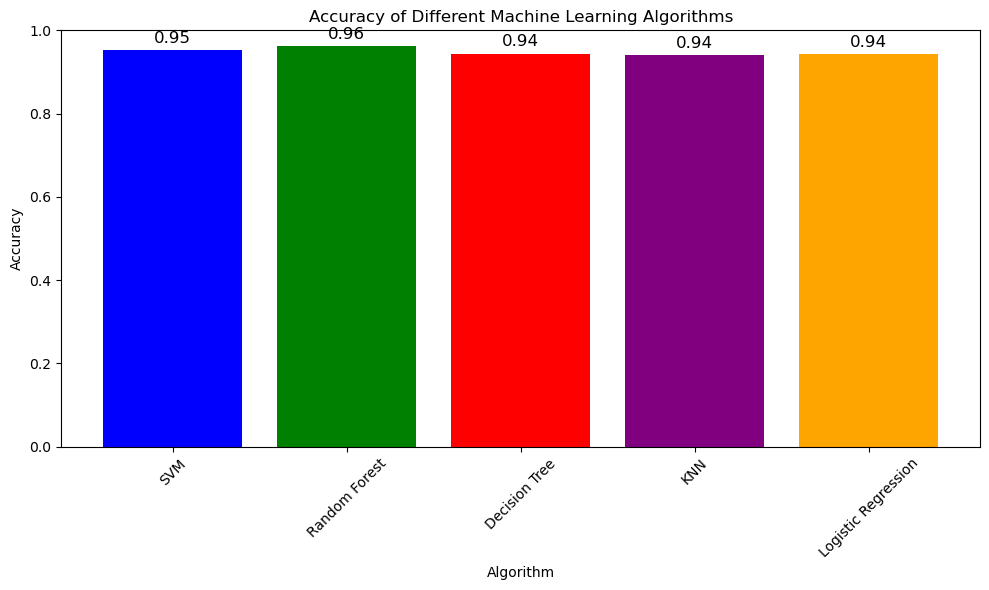

In [89]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_150_api, accuracy_rf_150_api, accuracy_dt_150_api, accuracy_knn_150_api, accuracy_logistic_150_api]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 (0% to 100%)
plt.xticks(rotation=45)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


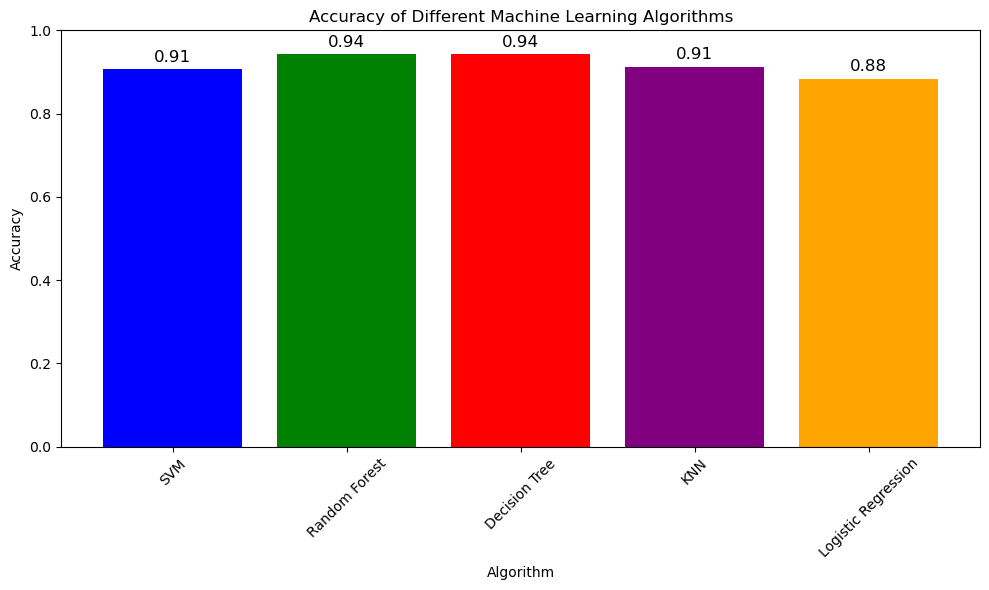

In [90]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_100_api, accuracy_rf_100_api, accuracy_dt_100_api, accuracy_knn_100_api, accuracy_logistic_100_api]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 (0% to 100%)
plt.xticks(rotation=45)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


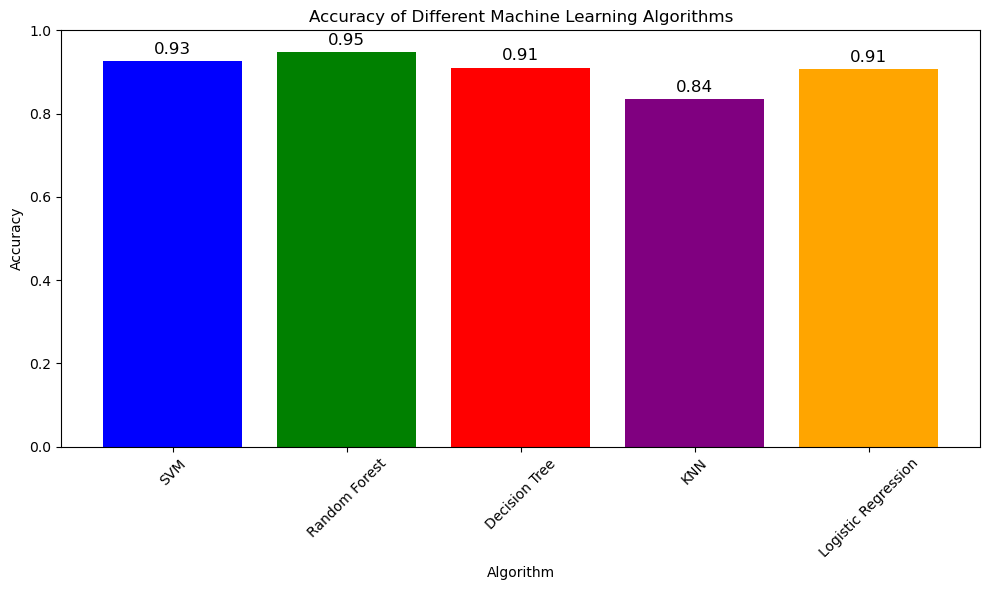

In [91]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_75_api, accuracy_rf_75_api, accuracy_dt_75_api, accuracy_knn_75_api, accuracy_logistic_75_api]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 (0% to 100%)
plt.xticks(rotation=45)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


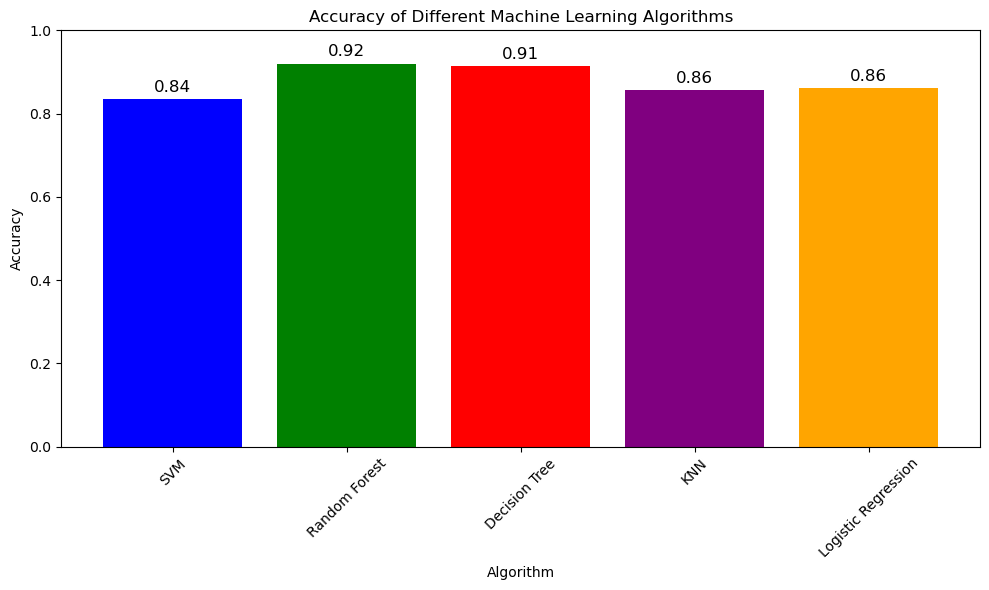

In [92]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_50_api, accuracy_rf_50_api, accuracy_dt_50_api, accuracy_knn_50_api, accuracy_logistic_50_api]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 (0% to 100%)
plt.xticks(rotation=45)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Permission and API calls

In [35]:
apicall_dataset_Permission = ['SEND_SMS'
,'READ_PHONE_STATE'
,'GET_ACCOUNTS'
,'RECEIVE_SMS'
,'READ_SMS'
,'getCallingUid'
,'USE_CREDENTIALS'
,'MANAGE_ACCOUNTS'
,'WRITE_SMS'
,'READ_SYNC_SETTINGS'
,'AUTHENTICATE_ACCOUNTS'
,'WRITE_HISTORY_BOOKMARKS'
,'TelephonyManager.getSubscriberId'
,'INSTALL_PACKAGES'
,'CAMERA'
,'WRITE_SYNC_SETTINGS'
,'READ_HISTORY_BOOKMARKS'
,'INTERNET'
,'android.intent.action.PACKAGE_REPLACED'
,'Binder'
,'android.intent.action.SEND_MULTIPLE'
,'RECORD_AUDIO'
,'IBinder'
,'createSubprocess'
,'NFC'
,'ACCESS_LOCATION_EXTRA_COMMANDS'
,'URLClassLoader'
,'WRITE_APN_SETTINGS'
,'abortBroadcast'
,'BIND_REMOTEVIEWS'
,'android.intent.action.TIME_SET'
,'READ_PROFILE'
,'TelephonyManager.getDeviceId'
,'MODIFY_AUDIO_SETTINGS'
,'getCallingPid'
,'READ_SYNC_STATS'
,'BROADCAST_STICKY'
,'android.intent.action.PACKAGE_REMOVED'
,'android.intent.action.TIMEZONE_CHANGED'
,'WAKE_LOCK'
,'RECEIVE_BOOT_COMPLETED'
,'RESTART_PACKAGES'
,'Ljava.lang.Class.getPackage'
,'chmod'
,'Ljava.lang.Class.getDeclaredClasses'
,'android.intent.action.ACTION_POWER_DISCONNECTED'
,'android.intent.action.PACKAGE_ADDED'
,'PathClassLoader'
,'TelephonyManager.getSimSerialNumber'
,'Runtime.load'
,'TelephonyManager.getCallState'
,'BLUETOOTH'
,'READ_CALENDAR'
,'READ_CALL_LOG'
,'SUBSCRIBED_FEEDS_WRITE'
,'READ_EXTERNAL_STORAGE'
,'sendMultipartTextMessage'
,'PackageInstaller'
,'VIBRATE'
,'remount'
,'android.intent.action.ACTION_SHUTDOWN'
,'sendDataMessage'
,'ACCESS_NETWORK_STATE'
,'chown'
,'HttpPost.init'
,'Ljava.lang.Class.getClasses'
,'SUBSCRIBED_FEEDS_READ'
,'TelephonyManager.isNetworkRoaming'
,'CHANGE_WIFI_MULTICAST_STATE'
,'WRITE_CALENDAR'
,'android.intent.action.PACKAGE_DATA_CLEARED'
,'MASTER_CLEAR'
,'HttpUriRequest'
,'UPDATE_DEVICE_STATS'
,'WRITE_CALL_LOG'
,'DELETE_PACKAGES'
,'GET_TASKS'
,'GLOBAL_SEARCH'
,'DELETE_CACHE_FILES'
,'WRITE_USER_DICTIONARY'
,'android.intent.action.PACKAGE_CHANGED'
,'android.intent.action.NEW_OUTGOING_CALL'
,'REORDER_TASKS'
,'WRITE_PROFILE'
,'SET_WALLPAPER'
,'BIND_INPUT_METHOD'
,'divideMessage'
,'READ_SOCIAL_STREAM'
,'READ_USER_DICTIONARY'
,'PROCESS_OUTGOING_CALLS'
,'CALL_PRIVILEGED'
,'Runtime.exec'
,'BIND_WALLPAPER'
,'RECEIVE_WAP_PUSH'
,'DUMP'
,'BATTERY_STATS'
,'ACCESS_COARSE_LOCATION'
,'SET_TIME'
,'android.intent.action.SENDTO'
,'WRITE_SOCIAL_STREAM'
,'WRITE_SETTINGS'
,'REBOOT'
,'BLUETOOTH_ADMIN'
,'TelephonyManager.getNetworkOperator'
,'/system/bin'
,'MessengerService'
,'BIND_DEVICE_ADMIN'
,'WRITE_GSERVICES'
,'transact'
,'onServiceConnected'
,'bindService'
,'attachInterface'
,'ServiceConnection'
,'android.os.Binder'
,'Ljava.lang.Class.getCanonicalName'
,'Ljava.lang.Class.getMethods'
,'Ljava.lang.Class.cast'
,'Ljava.net.URLDecoder'
,'android.content.pm.Signature'
,'android.telephony.SmsManager'
,'Ljava.lang.Class.getField'
,'Landroid.content.Context.registerReceiver'
,'Ljava.lang.Class.getDeclaredField'
,'Ljava.lang.Class.getMethod'
,'System.loadLibrary'
,'android.intent.action.SEND'
,'Ljavax.crypto.Cipher'
,'WRITE_SMS'
,'READ_SYNC_SETTINGS'
,'AUTHENTICATE_ACCOUNTS'
,'android.telephony.gsm.SmsManager'
,'WRITE_HISTORY_BOOKMARKS'
,'TelephonyManager.getSubscriberId'
,'mount'
,'INSTALL_PACKAGES'
,'Runtime.getRuntime'
,'CAMERA'
,'Ljava.lang.Object.getClass'
,'WRITE_SYNC_SETTINGS'
,'READ_HISTORY_BOOKMARKS'
,'Ljava.lang.Class.forName'
,'INTERNET'
,'android.intent.action.PACKAGE_REPLACED'
,'Binder'
,'android.intent.action.SEND_MULTIPLE'
,'RECORD_AUDIO'
,'IBinder'
,'android.os.IBinder'
,'createSubprocess'
,'NFC'
,'ACCESS_LOCATION_EXTRA_COMMANDS'
,'URLClassLoader'
,'WRITE_APN_SETTINGS'
,'abortBroadcast'
,'BIND_REMOTEVIEWS'
,'android.intent.action.TIME_SET'
,'READ_PROFILE'
,'TelephonyManager.getDeviceId'
,'MODIFY_AUDIO_SETTINGS'
,'getCallingPid'
,'READ_SYNC_STATS'
,'BROADCAST_STICKY'
,'android.intent.action.PACKAGE_REMOVED'
,'android.intent.action.TIMEZONE_CHANGED'
,'WAKE_LOCK'
,'RECEIVE_BOOT_COMPLETED'
,'RESTART_PACKAGES'
,'Ljava.lang.Class.getPackage'
,'chmod'
,'Ljava.lang.Class.getDeclaredClasses'
,'android.intent.action.ACTION_POWER_DISCONNECTED'
,'android.intent.action.PACKAGE_ADDED'
,'PathClassLoader'
,'TelephonyManager.getSimSerialNumber'
,'Runtime.load'
,'TelephonyManager.getCallState'
,'BLUETOOTH'
,'READ_CALENDAR'
,'READ_CALL_LOG'
,'SUBSCRIBED_FEEDS_WRITE'
,'class']

apicall_dataset_Permission  =  drebin_data[apicall_dataset_Permission]

print(apicall_dataset_Permission)

       SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
0             1                 1             0            0         0   
1             1                 1             0            1         1   
2             1                 1             0            0         0   
3             0                 1             0            0         1   
4             0                 1             0            0         0   
...         ...               ...           ...          ...       ...   
15031         0                 1             0            0         0   
15032         0                 0             0            0         0   
15033         0                 1             0            0         0   
15034         0                 0             1            0         0   
15035         0                 0             0            0         0   

       getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  \
0                  0                0     

In [36]:
malware_samples_apicall_dataset_Permission = apicall_dataset_Permission[apicall_dataset_Permission['class'] == 'S']
malware_samples_apicall_dataset_Permission

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,class
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,S
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,S
5556,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
5557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
5558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S


In [37]:
benign_samples_apicall_dataset_Permission = apicall_dataset_Permission[apicall_dataset_Permission['class'] == 'B']
benign_samples_apicall_dataset_Permission

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,class
5560,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
5561,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,B
5562,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
5564,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15033,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
15034,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,B


In [38]:
min_class_size = min(len(malware_samples_apicall_dataset_Permission), len(benign_samples_apicall_dataset_Permission))
min_class_size

5560

In [39]:
malware_samples_resampled_apicall_dataset_Permission = resample(malware_samples_apicall_dataset_Permission, replace=False, n_samples=min_class_size, random_state=42)
benign_samples_resampled_apicall_dataset_Permission = resample(benign_samples_apicall_dataset_Permission, replace=False, n_samples=min_class_size, random_state=42)



In [40]:
df_resampled_apicall_dataset_Permission = pd.concat([malware_samples_resampled_apicall_dataset_Permission, benign_samples_resampled_apicall_dataset_Permission])

In [41]:
df_resampled_apicall_dataset_Permission

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,getCallingUid,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,class
625,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,S
4023,1,1,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,S
1822,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3592,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3706,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13637,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,B
12063,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,B
13815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
6662,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,B


In [42]:
# Assuming 'class' is a string column containing 'B' and 'S'

# Replace 'True' with 'B' and 'False' with 'S' in the 'class' column
df_resampled_apicall_dataset_Permission['class'] = df_resampled_apicall_dataset_Permission['class'].replace({True: 'B', False: 'S'})

# Check the data types again
print(df_resampled_apicall_dataset_Permission)


       SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
625           0                 1             0            0         0   
4023          1                 1             0            1         1   
1822          1                 1             0            0         0   
3592          0                 1             0            0         0   
3706          1                 1             0            1         0   
...         ...               ...           ...          ...       ...   
13637         0                 0             1            0         0   
12063         0                 1             1            0         0   
13815         0                 0             0            0         0   
6662          0                 1             0            0         0   
8836          0                 1             1            0         0   

       getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  \
625                0                0     

In [43]:
unique_values = df_resampled_apicall_dataset_Permission['class'].unique()
print(unique_values)

['S' 'B']


In [44]:
print(df_resampled_apicall_dataset_Permission)

       SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
625           0                 1             0            0         0   
4023          1                 1             0            1         1   
1822          1                 1             0            0         0   
3592          0                 1             0            0         0   
3706          1                 1             0            1         0   
...         ...               ...           ...          ...       ...   
13637         0                 0             1            0         0   
12063         0                 1             1            0         0   
13815         0                 0             0            0         0   
6662          0                 1             0            0         0   
8836          0                 1             1            0         0   

       getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  \
625                0                0     

In [45]:


# Drop the "class" column from the DataFrame
df_without_class_apicall_dataset_Permission = df_resampled_apicall_dataset_Permission.drop(columns=['class'])

# Verify that the "class" column is removed
print(df_without_class_apicall_dataset_Permission.head())

      SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
625          0                 1             0            0         0   
4023         1                 1             0            1         1   
1822         1                 1             0            0         0   
3592         0                 1             0            0         0   
3706         1                 1             0            1         0   

      getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  \
625               0                0                0          0   
4023              0                0                0          1   
1822              0                0                0          0   
3592              0                0                0          0   
3706              0                0                0          0   

      READ_SYNC_SETTINGS  ...  \
625                    0  ...   
4023                   0  ...   
1822                   0  ...   
3592                

In [46]:
from mlxtend.frequent_patterns import fpgrowth

# Define the minimum support threshold (you can adjust this)
min_support = 0.3

# Apply FP-Growth to find frequent itemsets
frequent_itemsets_apicall_dataset_Permission = fpgrowth(df_without_class_apicall_dataset_Permission, min_support=min_support, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets_apicall_dataset_Permission)

C:\Users\aravi\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


         support                                           itemsets
0       0.769335                                           (Binder)
1       0.769335                                           (Binder)
2       0.763309                                          (IBinder)
3       0.763309                                          (IBinder)
4       0.763219                               (android.os.IBinder)
...          ...                                                ...
133520  0.300719  (Binder, attachInterface, android.os.Binder, a...
133521  0.300719  (Binder, attachInterface, android.os.Binder, a...
133522  0.300719  (Binder, attachInterface, android.os.Binder, a...
133523  0.300719  (Binder, attachInterface, android.os.Binder, a...
133524  0.300719  (Binder, attachInterface, android.os.Binder, a...

[133525 rows x 2 columns]


In [47]:
# 'frequent_itemsets' contains your FP-Growth results
sorted_frequent_itemsets_apicall_dataset_Permission = frequent_itemsets.sort_values(by='support', ascending=False)

# Select the top 50, 75, 100, and 150 frequent patterns
top_50_patterns_apicall_dataset_Permission = sorted_frequent_itemsets_apicall_dataset_Permission.head(50)
top_75_patterns_apicall_dataset_Permission = sorted_frequent_itemsets_apicall_dataset_Permission.head(75)
top_100_patterns_apicall_dataset_Permission = sorted_frequent_itemsets_apicall_dataset_Permission.head(100)
top_150_patterns_apicall_dataset_Permission = sorted_frequent_itemsets_apicall_dataset_Permission.head(150)



In [48]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules_apicall_dataset_Permission = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)




In [49]:
# Sort frequent itemsets by support in descending order
top_combinations_apicall_dataset_Permission = frequent_itemsets.sort_values(by='support', ascending=False).head(150)

# Print the top combinations
print(top_combinations_apicall_dataset_Permission)


       support                                           itemsets
16    0.891727                                         (INTERNET)
0     0.769335                                           (Binder)
1     0.763309                                          (IBinder)
30    0.763309                                  (Binder, IBinder)
29    0.721403                                 (Binder, INTERNET)
...        ...                                                ...
127   0.387500  (Binder, TelephonyManager.getDeviceId, HttpUri...
6548  0.387410                 (INTERNET, RECEIVE_BOOT_COMPLETED)
546   0.387320        (INTERNET, ACCESS_NETWORK_STATE, WAKE_LOCK)
72    0.387140         (READ_PHONE_STATE, Binder, HttpUriRequest)
133   0.387050  (Binder, INTERNET, TelephonyManager.getDeviceI...

[150 rows x 2 columns]


In [50]:

# Select the columns related to combinations (exclude the 'class' column)
combination_columns = [col for col in df_resampled_apicall_dataset_Permission.columns if col != 'class']

# Create a new DataFrame for the co-existence dataset
co_existence_dataset = df_resampled_apicall_dataset_Permission[combination_columns]

# Add the 'class' column back to the co-existence dataset if needed
co_existence_dataset['class'] = df_resampled_apicall_dataset_Permission['class']

# Print or save the co-existence dataset
print(co_existence_dataset)

# Now, 'co_existence_dataset' contains the co-existence information of combinations in each app.
# You can further save it to a CSV file or use it for further analysis and model building.


       SEND_SMS  READ_PHONE_STATE  GET_ACCOUNTS  RECEIVE_SMS  READ_SMS  \
625           0                 1             0            0         0   
4023          1                 1             0            1         1   
1822          1                 1             0            0         0   
3592          0                 1             0            0         0   
3706          1                 1             0            1         0   
...         ...               ...           ...          ...       ...   
13637         0                 0             1            0         0   
12063         0                 1             1            0         0   
13815         0                 0             0            0         0   
6662          0                 1             0            0         0   
8836          0                 1             1            0         0   

       getCallingUid  USE_CREDENTIALS  MANAGE_ACCOUNTS  WRITE_SMS  WRITE_SMS  \
625                0           

C:\Users\aravi\AppData\Local\Temp\ipykernel_15800\109725903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_existence_dataset['class'] = df_resampled_apicall_dataset_Permission['class']


# SVM

In [51]:
import random

# Number of columns to select 
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_150_pa = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_150_pa)

# More detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 474) (8896,)
Testing set shape: (2224, 474) (2224,)
SVM Accuracy: 0.9550359712230215
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.96      1112
           S       0.97      0.94      0.95      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [110]:
import random

# Number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_100_pa = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_100_pa)

# More detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 301) (8896,)
Testing set shape: (2224, 301) (2224,)
SVM Accuracy: 0.9554856115107914
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.96      1112
           S       0.97      0.94      0.95      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [111]:
import random

# Number of columns to select 
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_75_pa = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_75_pa)

# More detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 210) (8896,)
Testing set shape: (2224, 210) (2224,)
SVM Accuracy: 0.9321043165467626
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.91      0.93      1112
           S       0.92      0.95      0.93      1112

    accuracy                           0.93      2224
   macro avg       0.93      0.93      0.93      2224
weighted avg       0.93      0.93      0.93      2224



In [112]:
import random

# Number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()

feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

X = selected_df.drop(columns=['class'])
Y = selected_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_50_pa = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", accuracy_svm_50_pa)

# More detailed metrics
report_svm = classification_report(Y_test, Y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (8896, 158) (8896,)
Testing set shape: (2224, 158) (2224,)
SVM Accuracy: 0.8664568345323741
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.77      0.85      1112
           S       0.81      0.96      0.88      1112

    accuracy                           0.87      2224
   macro avg       0.88      0.87      0.87      2224
weighted avg       0.88      0.87      0.87      2224



# Random forest

In [53]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_150_pa = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_150_pa)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 471) (8896,)
Testing set shape: (2224, 471) (2224,)
Random Forest Accuracy: 0.9757194244604317
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.98      0.98      1112
           S       0.98      0.97      0.98      1112

    accuracy                           0.98      2224
   macro avg       0.98      0.98      0.98      2224
weighted avg       0.98      0.98      0.98      2224



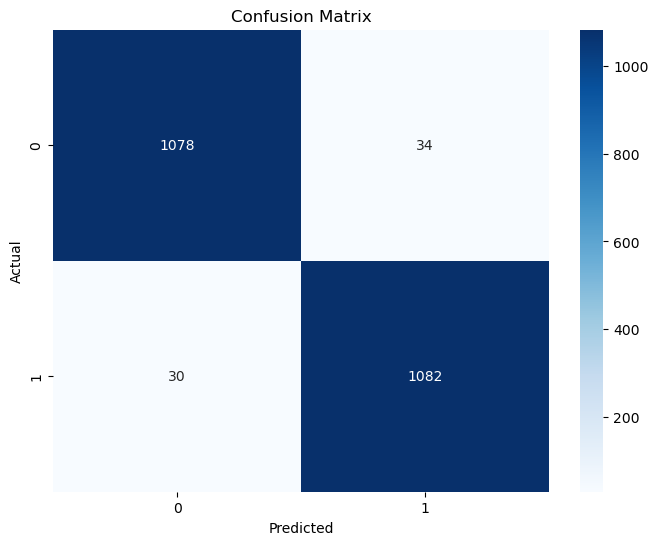

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [115]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_100_pa = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_100_pa)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 322) (8896,)
Testing set shape: (2224, 322) (2224,)
Random Forest Accuracy: 0.9626798561151079
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.97      0.96      1112
           S       0.97      0.96      0.96      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [116]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_75_pa = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_75_pa)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 213) (8896,)
Testing set shape: (2224, 213) (2224,)
Random Forest Accuracy: 0.9640287769784173
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.97      0.96      1112
           S       0.97      0.96      0.96      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [117]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_50_pa = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_50_pa)

# Print a classification report for more detailed metrics
report_rf = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (8896, 164) (8896,)
Testing set shape: (2224, 164) (2224,)
Random Forest Accuracy: 0.9195143884892086
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.90      0.94      0.92      1112
           S       0.94      0.90      0.92      1112

    accuracy                           0.92      2224
   macro avg       0.92      0.92      0.92      2224
weighted avg       0.92      0.92      0.92      2224



# Decision tree

In [118]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_150_pa = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_150_pa)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 459) (8896,)
Testing set shape: (2224, 459) (2224,)
Decision Tree Accuracy: 0.9590827338129496
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.95      0.96      1112
           S       0.95      0.97      0.96      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [119]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_100_pa = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_100_pa)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 319) (8896,)
Testing set shape: (2224, 319) (2224,)
Decision Tree Accuracy: 0.9505395683453237
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.95      0.95      1112
           S       0.95      0.95      0.95      1112

    accuracy                           0.95      2224
   macro avg       0.95      0.95      0.95      2224
weighted avg       0.95      0.95      0.95      2224



In [120]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_75_pa = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_75_pa)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 228) (8896,)
Testing set shape: (2224, 228) (2224,)
Decision Tree Accuracy: 0.9321043165467626
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.93      0.93      1112
           S       0.93      0.94      0.93      1112

    accuracy                           0.93      2224
   macro avg       0.93      0.93      0.93      2224
weighted avg       0.93      0.93      0.93      2224



In [121]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Predict on the testing data using Decision Tree
Y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_50_pa = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_50_pa)

# Print a classification report for Decision Tree
report_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Training set shape: (8896, 155) (8896,)
Testing set shape: (2224, 155) (2224,)
Decision Tree Accuracy: 0.9244604316546763
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.94      0.93      1112
           S       0.93      0.91      0.92      1112

    accuracy                           0.92      2224
   macro avg       0.92      0.92      0.92      2224
weighted avg       0.92      0.92      0.92      2224



# KNN

In [122]:
import random

# Define the number of columns to select 
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_150_pa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_150_pa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 450) (8896,)
Testing set shape: (2224, 450) (2224,)
KNN Accuracy: 0.9590827338129496
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.95      0.96      1112
           S       0.95      0.97      0.96      1112

    accuracy                           0.96      2224
   macro avg       0.96      0.96      0.96      2224
weighted avg       0.96      0.96      0.96      2224



In [123]:
import random

# Define the number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_100_pa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_100_pa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 313) (8896,)
Testing set shape: (2224, 313) (2224,)
KNN Accuracy: 0.9455935251798561
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.93      0.94      1112
           S       0.93      0.96      0.95      1112

    accuracy                           0.95      2224
   macro avg       0.95      0.95      0.95      2224
weighted avg       0.95      0.95      0.95      2224



In [124]:
import random

# Define the number of columns to select 
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_75_pa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_75_pa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 210) (8896,)
Testing set shape: (2224, 210) (2224,)
KNN Accuracy: 0.9375
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.93      0.94      1112
           S       0.93      0.94      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



In [125]:
import random

# Define the number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_50_pa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_50_pa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)


Training set shape: (8896, 143) (8896,)
Testing set shape: (2224, 143) (2224,)
KNN Accuracy: 0.9442446043165468
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.96      0.95      1112
           S       0.96      0.93      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



# Logistic regression

In [126]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_150_pa = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_150_pa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 456) (8896,)
Testing set shape: (2224, 456) (2224,)
Logistic Regression Accuracy: 0.9536870503597122
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.95      0.95      1112
           S       0.95      0.96      0.95      1112

    accuracy                           0.95      2224
   macro avg       0.95      0.95      0.95      2224
weighted avg       0.95      0.95      0.95      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_100_pa = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_100_pa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 292) (8896,)
Testing set shape: (2224, 292) (2224,)
Logistic Regression Accuracy: 0.9419964028776978
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.94      0.94      1112
           S       0.94      0.95      0.94      1112

    accuracy                           0.94      2224
   macro avg       0.94      0.94      0.94      2224
weighted avg       0.94      0.94      0.94      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_75_pa = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_75_pa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 231) (8896,)
Testing set shape: (2224, 231) (2224,)
Logistic Regression Accuracy: 0.9150179856115108
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.90      0.91      1112
           S       0.91      0.93      0.92      1112

    accuracy                           0.92      2224
   macro avg       0.92      0.92      0.92      2224
weighted avg       0.92      0.92      0.92      2224



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (Y)
X = selected_df.drop(columns=['class'])
Y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_50_pa = accuracy_score(Y_test, Y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_50_pa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(Y_test, Y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Training set shape: (8896, 155) (8896,)
Testing set shape: (2224, 155) (2224,)
Logistic Regression Accuracy: 0.8700539568345323
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.78      0.86      1112
           S       0.81      0.96      0.88      1112

    accuracy                           0.87      2224
   macro avg       0.88      0.87      0.87      2224
weighted avg       0.88      0.87      0.87      2224



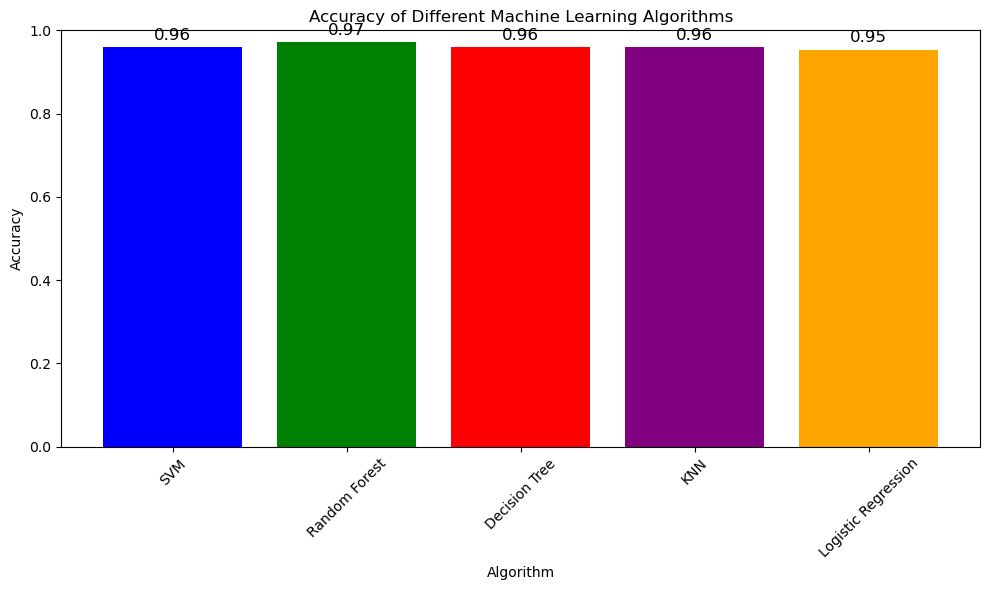

In [130]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_150_pa, accuracy_rf_150_pa, accuracy_dt_150_pa, accuracy_knn_150_pa, accuracy_logistic_150_pa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


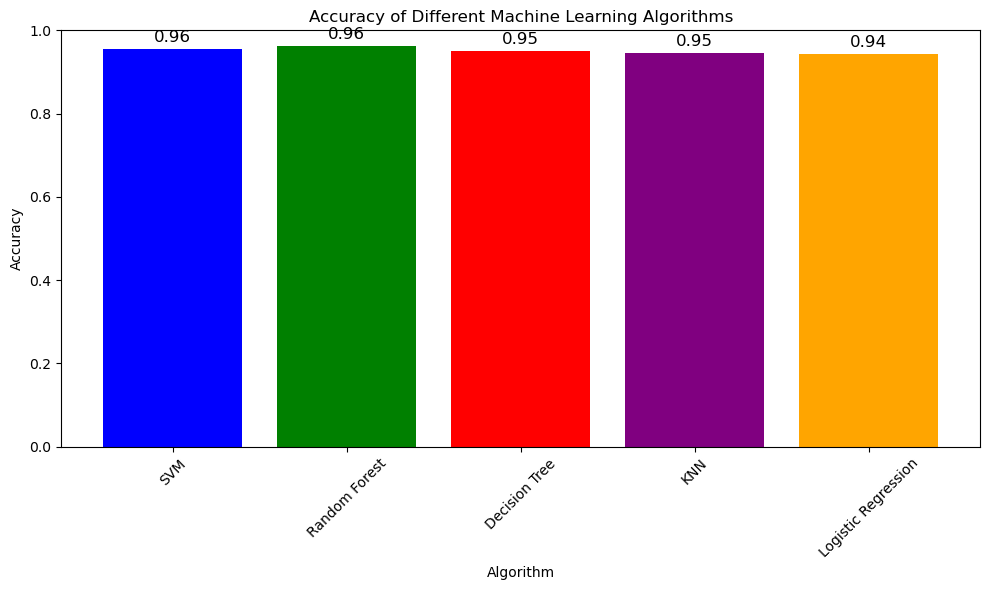

In [131]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_100_pa, accuracy_rf_100_pa, accuracy_dt_100_pa, accuracy_knn_100_pa, accuracy_logistic_100_pa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


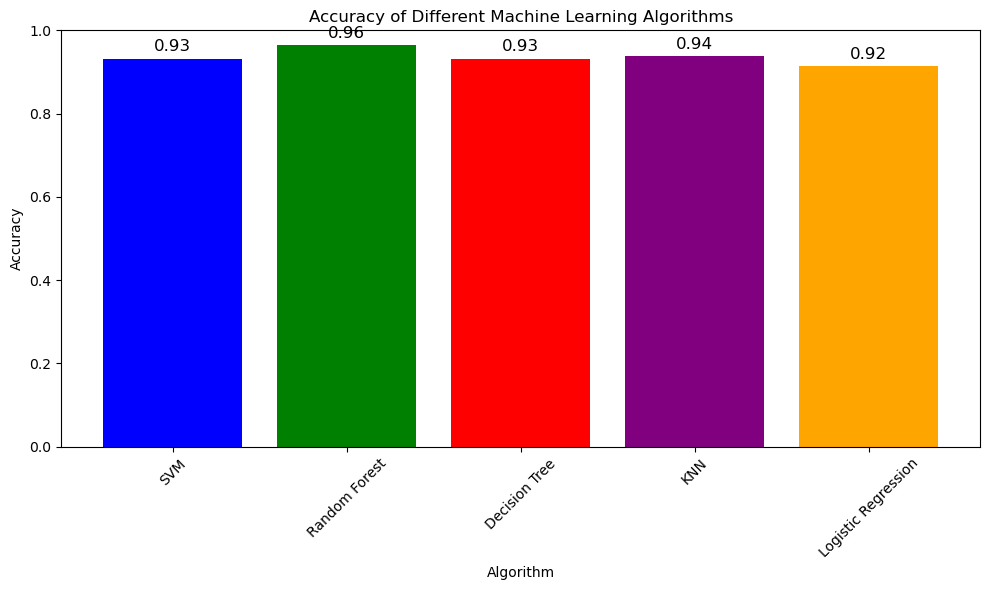

In [132]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_75_pa, accuracy_rf_75_pa, accuracy_dt_75_pa, accuracy_knn_75_pa, accuracy_logistic_75_pa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


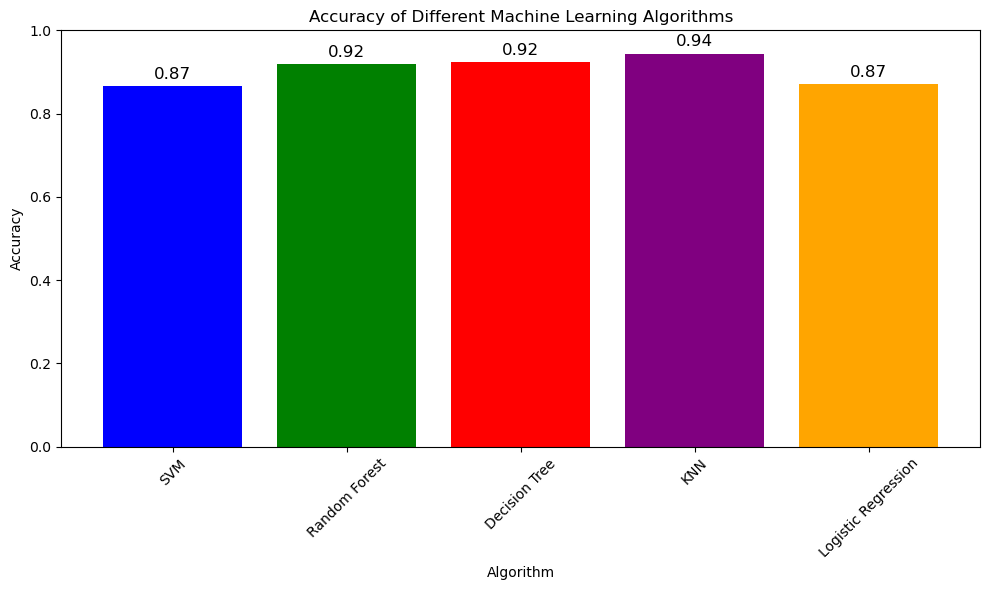

In [133]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_50_pa, accuracy_rf_50_pa, accuracy_dt_50_pa, accuracy_knn_50_pa, accuracy_logistic_50_pa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


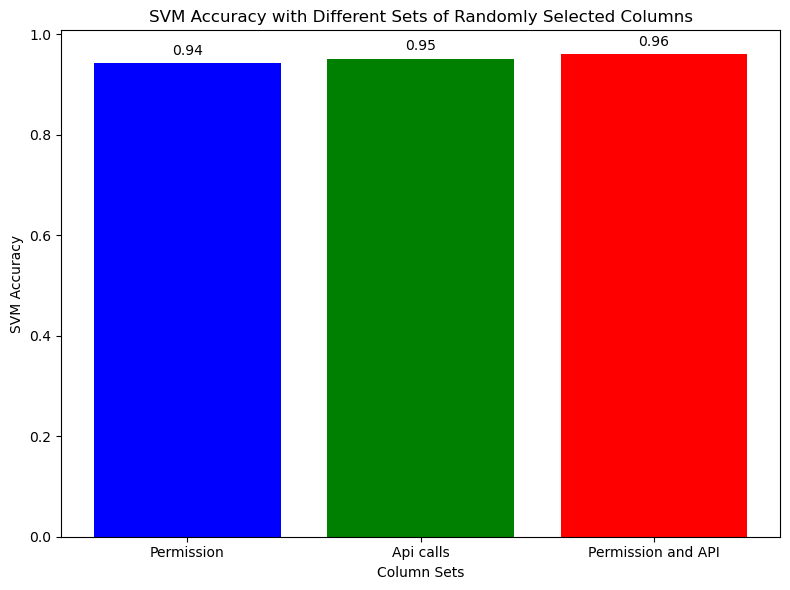

In [134]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_150, accuracy_svm_150_api, accuracy_svm_150_pa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


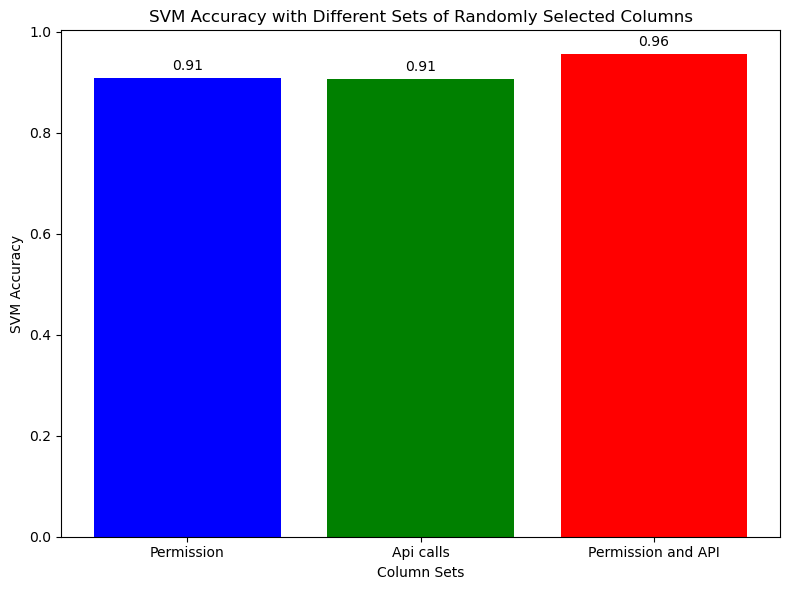

In [135]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_100, accuracy_svm_100_api, accuracy_svm_100_pa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


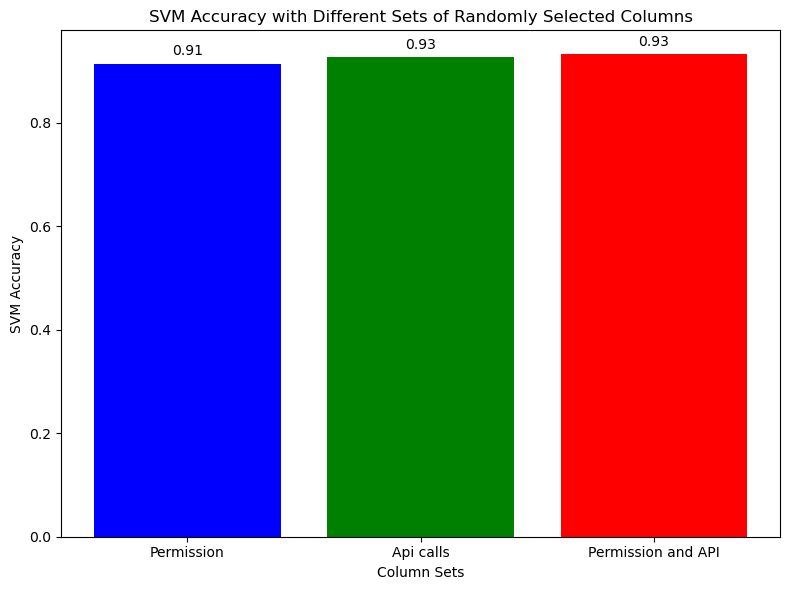

In [136]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_75, accuracy_svm_75_api, accuracy_svm_75_pa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


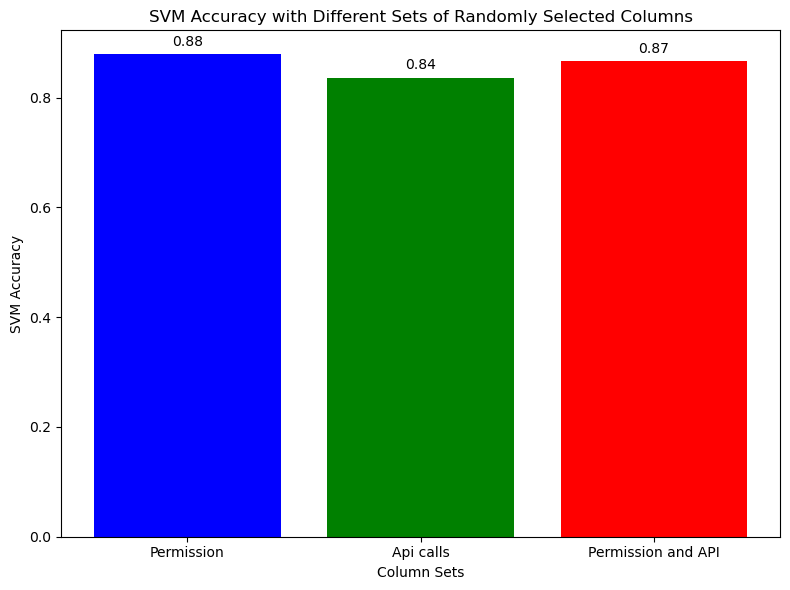

In [137]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_50, accuracy_svm_50_api, accuracy_svm_50_pa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


# DATASET 2

# permission

In [138]:
import pandas as pd
from sklearn.utils import resample

In [139]:
malgenome_data = pd.read_csv("malgenome215dataset1260malware2539benign (1).csv")
malgenome_data

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,S
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,S
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,B
3795,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,B
3796,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,B
3797,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,B


In [140]:
missing_val_malge = malgenome_data.isnull().sum()
missing_val_malge

transact                                 0
bindService                              0
onServiceConnected                       0
ServiceConnection                        0
android.os.Binder                        0
                                        ..
GLOBAL_SEARCH                            0
GET_PACKAGE_SIZE                         0
SET_PREFERRED_APPLICATIONS               0
android.intent.action.PACKAGE_CHANGED    0
class                                    0
Length: 216, dtype: int64

In [141]:
Permission_dataset_m=['READ_SMS',
'WRITE_SMS',
'TelephonyManager.getSubscriberId',
'Ljava.lang.Class.getCanonicalName',
'Ljava.lang.Class.getMethods',
'android.intent.action.BOOT_COMPLETED',
'Ljava.lang.Class.getField',
'READ_PHONE_STATE',
'Landroid.content.Context.unregisterReceiver',
'GET_ACCOUNTS',
'SEND_SMS',
'Landroid.content.Context.registerReceiver',
'getBinder',
'Ljava.lang.Class.cast',
'chmod',
'createSubprocess',
'Ljava.net.URLDecoder',
'WRITE_APN_SETTINGS',
'TelephonyManager.getDeviceId',
'RECEIVE_SMS',
'Ljava.lang.Class.getDeclaredField',
'HttpGet.init',
'Ljava.lang.Class.getPackage',
'abortBroadcast',
'ClassLoader',
'TelephonyManager.getLine1Number',
'getCallingUid',
'USE_CREDENTIALS',
'MANAGE_ACCOUNTS',
'android.telephony.gsm.SmsManager',
'.system.bin',
'Ljava.lang.Class.getMethod',
'RESTART_PACKAGES',
'INSTALL_PACKAGES',
'Ljava.lang.Class.forName',
'TelephonyManager.getSimSerialNumber',
'CAMERA',
'CALL_PHONE',
'android.intent.action.SEND',
'onBind',
'android.content.pm.Signature',
'READ_SYNC_SETTINGS',
'AUTHENTICATE_ACCOUNTS',
'INTERNET',
'PackageInstaller',
'ACCESS_LOCATION_EXTRA_COMMANDS',
'HttpUriRequest',
'remount',
'android.telephony.SmsManager',
'RECEIVE_BOOT_COMPLETED',
'android.intent.action.ACTION_POWER_CONNECTED',
'findClass',
'WRITE_CONTACTS',
'.system.app',
'Ljava.lang.Class.getResource',
'WRITE_SYNC_SETTINGS',
'android.intent.action.TIME_SET',
'android.intent.action.SEND_MULTIPLE',
'ACCESS_WIFI_STATE',
'URLClassLoader',
'BLUETOOTH',
'WAKE_LOCK',
'SYSTEM_ALERT_WINDOW',
'TelephonyManager.getSimCountryIso',
'chown',
'NFC',
'READ_HISTORY_BOOKMARKS',
'HttpPost.init',
'TelephonyManager.getNetworkOperator',
'Ljava.lang.Class.getClasses',
'BIND_REMOTEVIEWS',
'READ_PROFILE',
'READ_CALENDAR',
'CHANGE_WIFI_STATE',
'READ_SYNC_STATS',
'WRITE_HISTORY_BOOKMARKS',
'DISABLE_KEYGUARD',
'READ_LOGS',
'RECORD_AUDIO',
'getCallingPid',
'MODIFY_AUDIO_SETTINGS',
'android.intent.action.PACKAGE_REPLACED',
'android.intent.action.TIMEZONE_CHANGED',
'BROADCAST_STICKY',
'Runtime.exec',
'android.intent.action.PACKAGE_ADDED',
'MOUNT_UNMOUNT_FILESYSTEMS',
'android.intent.action.ACTION_POWER_DISCONNECTED',
'Ljava.lang.Class.getDeclaredClasses',
'android.intent.action.PACKAGE_REMOVED',
'BLUETOOTH_ADMIN',
'android.os.IBinder',
'IBinder',
'WRITE_SECURE_SETTINGS',
'WRITE_SETTINGS',
'Ljavax.crypto.spec.SecretKeySpec',
'android.intent.action.BATTERY_OKAY',
'READ_CONTACTS',
'Binder',
'SUBSCRIBED_FEEDS_READ',
'READ_CALL_LOG',
'SUBSCRIBED_FEEDS_WRITE',
'BATTERY_STATS',
'RECEIVE_WAP_PUSH',
'PathClassLoader',
'KILL_BACKGROUND_PROCESSES',
'ACCESS_COARSE_LOCATION',
'android.intent.action.ACTION_SHUTDOWN',
'Runtime.load'
,'class']
Permission_dataset_m =  malgenome_data[Permission_dataset_m]

print(Permission_dataset_m)

      READ_SMS  WRITE_SMS  TelephonyManager.getSubscriberId  \
0            0          0                                 0   
1            1          0                                 1   
2            0          0                                 0   
3            1          1                                 1   
4            1          1                                 1   
...        ...        ...                               ...   
3794         0          0                                 0   
3795         0          0                                 0   
3796         0          0                                 0   
3797         0          0                                 0   
3798         0          0                                 0   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                     0                            0   
1                                     0                            0   
2                          

In [142]:
malware_samples_permission_m = Permission_dataset_m[Permission_dataset_m['class'] == 'S']
malware_samples_permission_m

,READ_SMS,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,android.intent.action.BOOT_COMPLETED,Ljava.lang.Class.getField,READ_PHONE_STATE,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,...,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,BATTERY_STATS,RECEIVE_WAP_PUSH,PathClassLoader,KILL_BACKGROUND_PROCESSES,ACCESS_COARSE_LOCATION,android.intent.action.ACTION_SHUTDOWN,Runtime.load,class
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,S
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,S
3,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,S
4,1,1,1,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,S
1256,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
1257,1,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,S
1258,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,S


In [143]:
benign_samples_permission_m = Permission_dataset_m[Permission_dataset_m['class'] == 'B']
benign_samples_permission_m

,READ_SMS,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,android.intent.action.BOOT_COMPLETED,Ljava.lang.Class.getField,READ_PHONE_STATE,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,...,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,BATTERY_STATS,RECEIVE_WAP_PUSH,PathClassLoader,KILL_BACKGROUND_PROCESSES,ACCESS_COARSE_LOCATION,android.intent.action.ACTION_SHUTDOWN,Runtime.load,class
1260,0,0,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,B
1261,0,0,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,B
1262,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,B
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1264,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,B
3795,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,B
3796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
3797,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,B


In [144]:
min_class_size_m = min(len(malware_samples_permission_m), len(benign_samples_permission_m))
min_class_size_m

1260

In [145]:
malware_samples_resampled_permission_m = resample(malware_samples_permission_m, replace=False, n_samples=min_class_size_m, random_state=42)
benign_samples_resampled_permission_m = resample(benign_samples_permission_m, replace=False, n_samples=min_class_size_m, random_state=42)



In [146]:
df_resampled_permission_m = pd.concat([malware_samples_resampled_permission_m, benign_samples_resampled_permission_m])

In [147]:
df_resampled_permission_m

,READ_SMS,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,android.intent.action.BOOT_COMPLETED,Ljava.lang.Class.getField,READ_PHONE_STATE,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,...,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,BATTERY_STATS,RECEIVE_WAP_PUSH,PathClassLoader,KILL_BACKGROUND_PROCESSES,ACCESS_COARSE_LOCATION,android.intent.action.ACTION_SHUTDOWN,Runtime.load,class
76,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,S
1026,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,S
43,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,S
666,1,1,1,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,S
529,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,0,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,B
2835,0,0,0,1,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,B
2257,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,B
2436,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,B


In [148]:

df_without_class_m = df_resampled_permission_m.drop(columns=['class'])
print(df_without_class_m.head())


      READ_SMS  WRITE_SMS  TelephonyManager.getSubscriberId  \
76           1          1                                 1   
1026         0          0                                 0   
43           1          1                                 1   
666          1          1                                 1   
529          0          0                                 1   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
76                                    0                            0   
1026                                  0                            0   
43                                    0                            0   
666                                   0                            0   
529                                   0                            0   

      android.intent.action.BOOT_COMPLETED  Ljava.lang.Class.getField  \
76                                       1                          0   
1026                                     1

In [149]:
from mlxtend.frequent_patterns import fpgrowth
# Define the minimum support threshold (you can adjust this)
min_support = 0.3
frequent_itemsets_m = fpgrowth(df_without_class_m, min_support=min_support, use_colnames=True)
print(frequent_itemsets_m)

C:\Users\aravi\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


       support                                           itemsets
0     0.909127                                           (Binder)
1     0.907540                                         (INTERNET)
2     0.902778                                          (IBinder)
3     0.902778                               (android.os.IBinder)
4     0.819841                                           (onBind)
...        ...                                                ...
7129  0.301190  (ClassLoader, Ljava.lang.Class.getMethod, Ljav...
7130  0.301190  (ClassLoader, Ljava.lang.Class.getField, Ljava...
7131  0.301190  (ClassLoader, Ljava.lang.Class.getField, IBind...
7132  0.301984  (INTERNET, Ljava.lang.Class.getField, ClassLoa...
7133  0.301587  (Ljava.lang.Class.getField, ClassLoader, Ljava...

[7134 rows x 2 columns]


In [150]:
# Assuming 'frequent_itemsets' contains your FP-Growth results
sorted_frequent_itemsets_m= frequent_itemsets_m.sort_values(by='support', ascending=False)

# Select the top 50, 75, 100, and 150 frequent patterns
top_50_patterns_m = sorted_frequent_itemsets_m.head(50)
top_75_patterns_m = sorted_frequent_itemsets_m.head(75)
top_100_patterns_m = sorted_frequent_itemsets_m.head(100)
top_150_patterns_m = sorted_frequent_itemsets_m.head(150)



In [151]:
# Sort frequent itemsets by support in descending order
top_combinations_m = frequent_itemsets_m.sort_values(by='support', ascending=False).head(150)

# Print the top combinations
print(top_combinations_m)


       support                                           itemsets
0     0.909127                                           (Binder)
1     0.907540                                         (INTERNET)
36    0.902778                      (android.os.IBinder, IBinder)
37    0.902778                       (Binder, android.os.IBinder)
39    0.902778              (Binder, android.os.IBinder, IBinder)
...        ...                                                ...
2866  0.567460                           (HttpUriRequest, Binder)
2867  0.567063               (HttpUriRequest, android.os.IBinder)
2868  0.567063                          (HttpUriRequest, IBinder)
2874  0.567063       (HttpUriRequest, Binder, android.os.IBinder)
2880  0.567063  (HttpUriRequest, Binder, android.os.IBinder, I...

[150 rows x 2 columns]


In [152]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules_m = association_rules(frequent_itemsets_m, metric="lift", min_threshold=1.0)





In [153]:

for combination in top_combinations_m['itemsets']:
    combination_name = ', '.join(combination)
    df_resampled_permission_m[combination_name] = df_resampled_permission_m.apply(
        lambda row: 1 if all(row[item] == 1 for item in combination) else 0, axis=1
    )


In [154]:
# Select the columns related to combinations (exclude the 'class' column)
combination_columns_m = [col for col in df_resampled_permission_m.columns if col != 'class']

# Create a new DataFrame for the co-existence dataset
co_existence_dataset = df_resampled_permission_m[combination_columns_m]

# Add the 'class' column back to the co-existence dataset if needed
co_existence_dataset['class'] = df_resampled_permission_m['class']

# Print or save the co-existence dataset
print(co_existence_dataset)

# Now, 'co_existence_dataset' contains the co-existence information of combinations in each app.
# You can further save it to a CSV file or use it for further analysis and model building.


      READ_SMS  WRITE_SMS  TelephonyManager.getSubscriberId  \
76           1          1                                 1   
1026         0          0                                 0   
43           1          1                                 1   
666          1          1                                 1   
529          0          0                                 1   
...        ...        ...                               ...   
2651         0          0                                 1   
2835         0          0                                 0   
2257         0          0                                 0   
2436         0          0                                 0   
2300         0          0                                 0   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
76                                    0                            0   
1026                                  0                            0   
43                         

# SVM

In [155]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_150_mp = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_150_mp)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
SVM Accuracy: 0.9722222222222222
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       252
           S       0.98      0.96      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [156]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_100_mp = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_100_mp)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
SVM Accuracy: 0.9563492063492064
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.98      0.96       252
           S       0.98      0.93      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [157]:
import random

# Define the number of columns to select 
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_75_mp = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_75_mp)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
SVM Accuracy: 0.9623015873015873
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.98      0.96       252
           S       0.98      0.94      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [158]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_50_mp = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_50_mp)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)



Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
SVM Accuracy: 0.9404761904761905
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.96      0.94       252
           S       0.96      0.92      0.94       252

    accuracy                           0.94       504
   macro avg       0.94      0.94      0.94       504
weighted avg       0.94      0.94      0.94       504



# Random forest

In [159]:
import random

# Define the number of columns to select (150 in your case)
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_150_mp = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_150_mp)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
Random Forest Accuracy: 0.9900793650793651
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99       252
           S       0.99      0.99      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



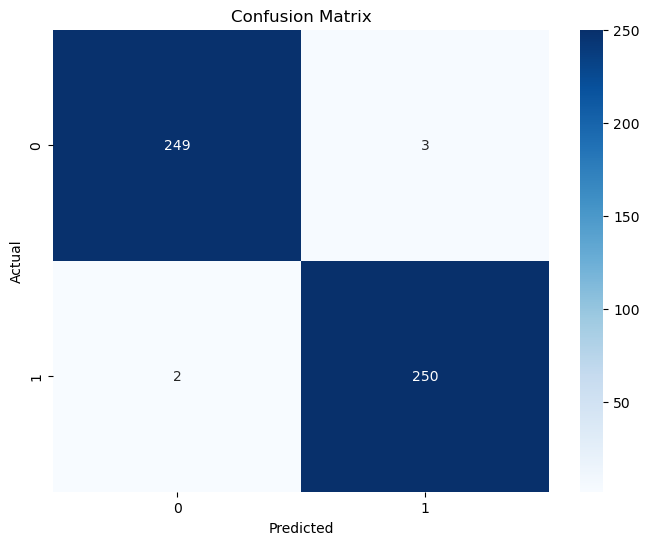

In [160]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [161]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_100_mp = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_100_mp)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
Random Forest Accuracy: 0.9880952380952381
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.98      0.99       252
           S       0.98      0.99      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [162]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_75_mp= accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_75_mp)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
Random Forest Accuracy: 0.9662698412698413
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       252
           S       0.98      0.96      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [163]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_50_mp = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_50_mp)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
Random Forest Accuracy: 0.9603174603174603
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96       252
           S       0.97      0.95      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



# Decision tree

In [164]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_150_mp= accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_150_mp)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
Decision Tree Accuracy: 0.9841269841269841
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.98      0.98       252
           S       0.98      0.99      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [165]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_100_mp = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_100_mp)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
Decision Tree Accuracy: 0.9583333333333334
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.95      0.96       252
           S       0.95      0.96      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [166]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_75_mp = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_75_mp)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
Decision Tree Accuracy: 0.9781746031746031
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.98      0.98       252
           S       0.98      0.97      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [167]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_50_mp = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_50_mp)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
Decision Tree Accuracy: 0.9325396825396826
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.95      0.93       252
           S       0.95      0.92      0.93       252

    accuracy                           0.93       504
   macro avg       0.93      0.93      0.93       504
weighted avg       0.93      0.93      0.93       504



# KNN

In [168]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_150_mp= accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_150_mp)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
KNN Accuracy: 0.9682539682539683
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       252
           S       0.98      0.96      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [169]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_100_mp = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_100_mp)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
KNN Accuracy: 0.9642857142857143
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.97      0.96       252
           S       0.97      0.96      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [170]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_75_mp = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_75_mp)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
KNN Accuracy: 0.9484126984126984
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.95      0.95       252
           S       0.95      0.94      0.95       252

    accuracy                           0.95       504
   macro avg       0.95      0.95      0.95       504
weighted avg       0.95      0.95      0.95       504



In [171]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_50_mp= accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_50_mp)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
KNN Accuracy: 0.9384920634920635
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.94      0.94       252
           S       0.94      0.94      0.94       252

    accuracy                           0.94       504
   macro avg       0.94      0.94      0.94       504
weighted avg       0.94      0.94      0.94       504



# Logistic regression

In [172]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_150_mp = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_150_mp)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
Logistic Regression Accuracy: 0.9781746031746031
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98       252
           S       0.99      0.97      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [173]:
import random

# Define the number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_100_mp = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_100_mp)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
Logistic Regression Accuracy: 0.9583333333333334
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.96      0.96       252
           S       0.96      0.95      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [174]:
import random

# Define the number of columns to select 
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_75_mp = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_75_mp)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
Logistic Regression Accuracy: 0.9464285714285714
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.96      0.95       252
           S       0.96      0.93      0.95       252

    accuracy                           0.95       504
   macro avg       0.95      0.95      0.95       504
weighted avg       0.95      0.95      0.95       504



In [175]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_50_mp = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_50_mp)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
Logistic Regression Accuracy: 0.9444444444444444
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.95      0.94       252
           S       0.95      0.94      0.94       252

    accuracy                           0.94       504
   macro avg       0.94      0.94      0.94       504
weighted avg       0.94      0.94      0.94       504



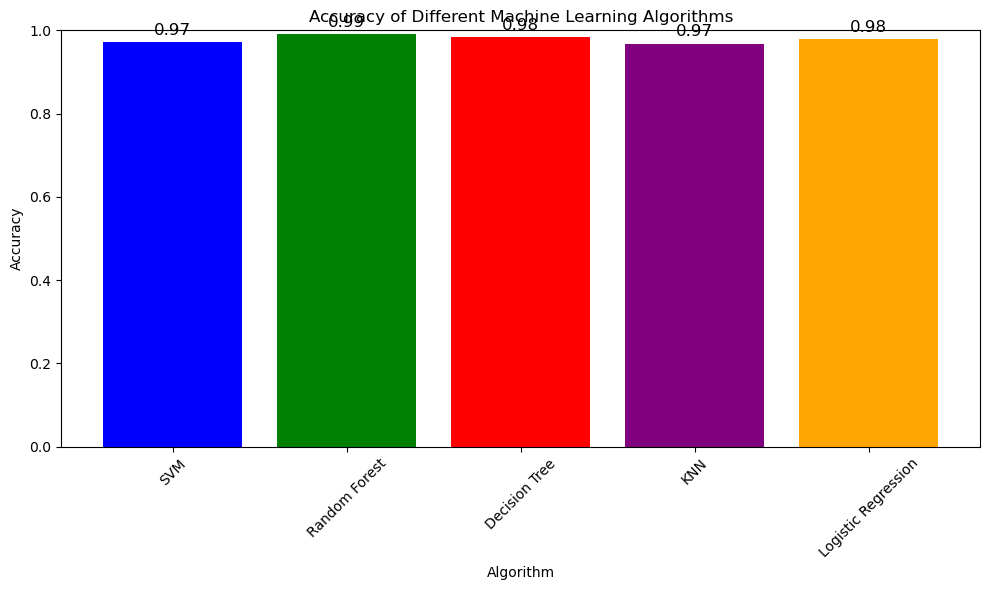

In [176]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_150_mp, accuracy_rf_150_mp, accuracy_dt_150_mp, accuracy_knn_150_mp, accuracy_logistic_150_mp]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


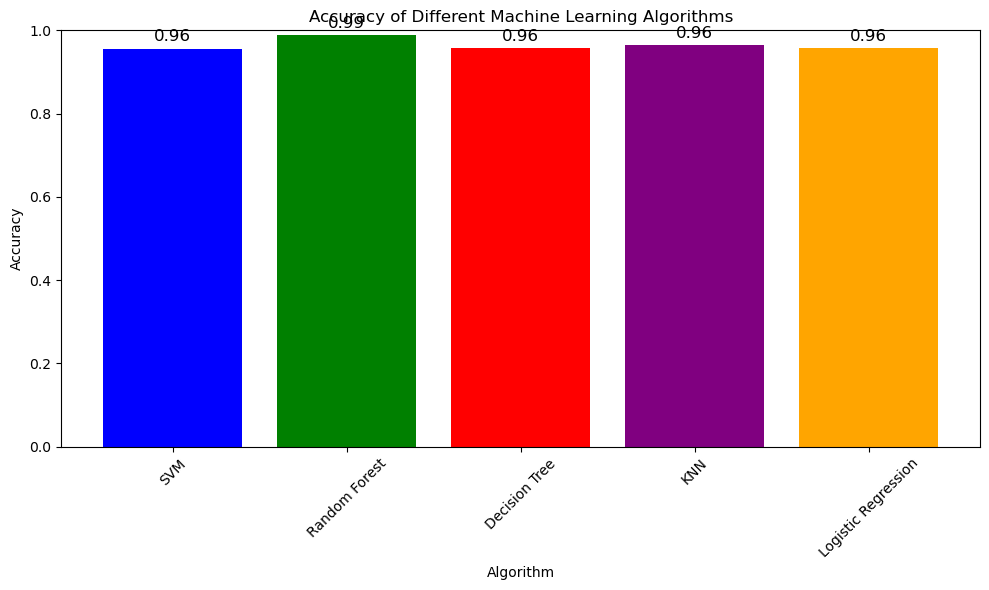

In [177]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_100_mp, accuracy_rf_100_mp, accuracy_dt_100_mp, accuracy_knn_100_mp, accuracy_logistic_100_mp]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45) 

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


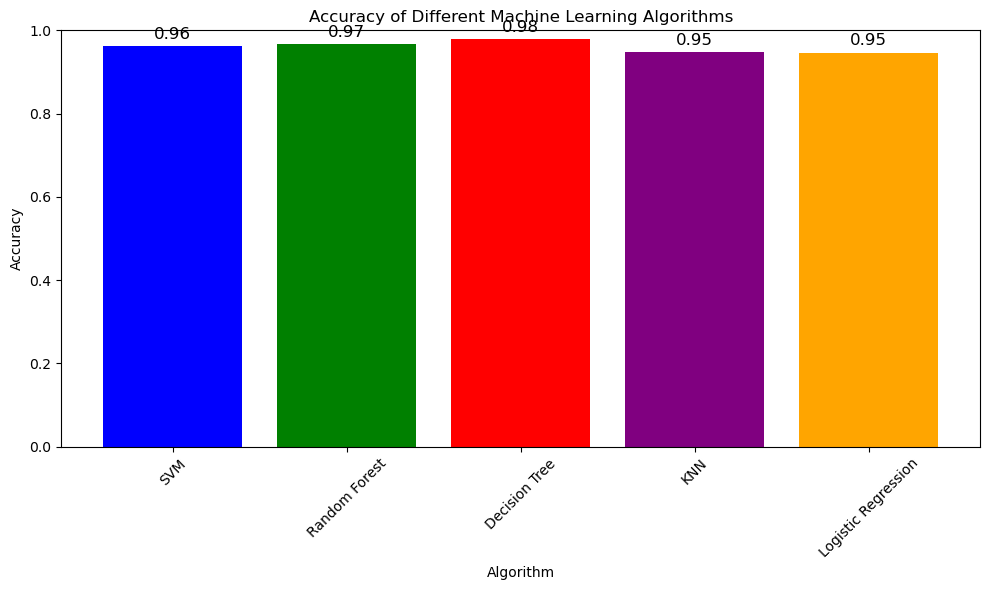

In [178]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_75_mp, accuracy_rf_75_mp, accuracy_dt_75_mp, accuracy_knn_75_mp, accuracy_logistic_75_mp]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


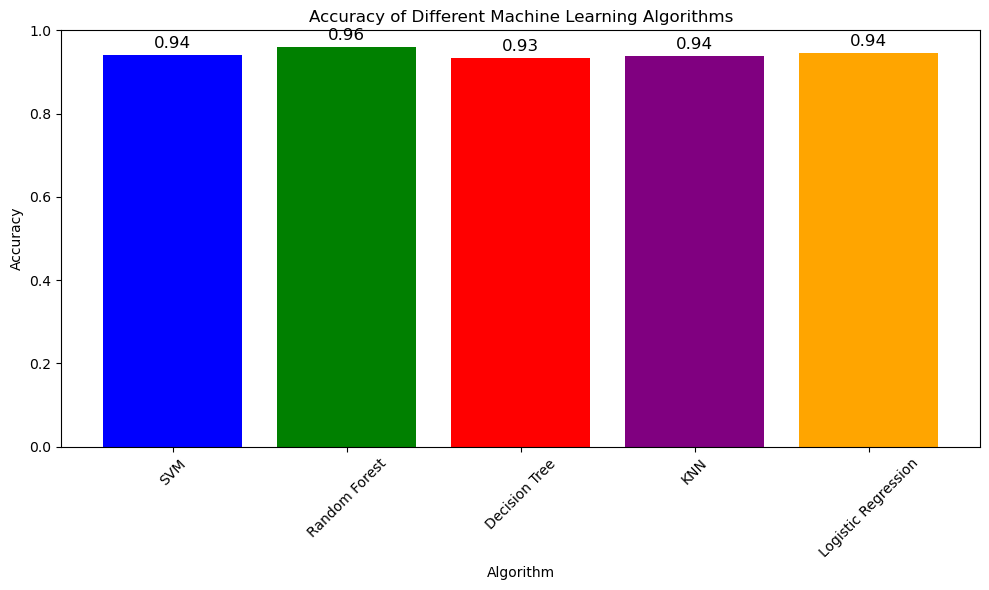

In [179]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_50_mp, accuracy_rf_50_mp, accuracy_dt_50_mp, accuracy_knn_50_mp, accuracy_logistic_50_mp]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45) 

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# API calls

In [180]:
import pandas as pd
from sklearn.utils import resample

In [181]:

malgenome_dataset= pd.read_csv('malgenome215dataset1260malware2539benign (1).csv')
malgenome_dataset

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,S
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,S
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,B
3795,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,B
3796,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,B
3797,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,B


In [182]:
apicall_dataset= ['transact',
'bindService',
'onServiceConnected',
'ServiceConnection',
'android.os.Binder',
'READ_SMS',
'attachInterface',
'WRITE_SMS',
'TelephonyManager.getSubscriberId',
'Ljava.lang.Class.getCanonicalName',
'Ljava.lang.Class.getMethods',
'android.intent.action.BOOT_COMPLETED',
'Ljava.lang.Class.getField',
'READ_PHONE_STATE',
'Landroid.content.Context.unregisterReceiver',
'GET_ACCOUNTS',
'SEND_SMS',
'Landroid.content.Context.registerReceiver',
'getBinder',
'Ljava.lang.Class.cast',
'chmod',
'createSubprocess',
'Ljava.net.URLDecoder',
'WRITE_APN_SETTINGS',
'TelephonyManager.getDeviceId',
'RECEIVE_SMS',
'Ljava.lang.Class.getDeclaredField',
'HttpGet.init',
'Ljava.lang.Class.getPackage',
'abortBroadcast',
'ClassLoader',
'TelephonyManager.getLine1Number',
'getCallingUid',
'USE_CREDENTIALS',
'MANAGE_ACCOUNTS',
'android.telephony.gsm.SmsManager',
'.system.bin',
'Ljava.lang.Class.getMethod',
'RESTART_PACKAGES',
'INSTALL_PACKAGES',
'Ljava.lang.Class.forName',
'TelephonyManager.getSimSerialNumber',
'CAMERA',
'CALL_PHONE',
'android.intent.action.SEND',
'onBind',
'android.content.pm.Signature',
'READ_SYNC_SETTINGS',
'AUTHENTICATE_ACCOUNTS',
'INTERNET',
'PackageInstaller',
'ACCESS_LOCATION_EXTRA_COMMANDS',
'HttpUriRequest',
'remount',
'android.telephony.SmsManager',
'RECEIVE_BOOT_COMPLETED',
'android.intent.action.ACTION_POWER_CONNECTED',
'findClass',
'WRITE_CONTACTS',
'.system.app',
'Ljava.lang.Class.getResource',
'WRITE_SYNC_SETTINGS',
'android.intent.action.TIME_SET',
'android.intent.action.SEND_MULTIPLE',
'ACCESS_WIFI_STATE',
'URLClassLoader',
'BLUETOOTH',
'WAKE_LOCK',
'SYSTEM_ALERT_WINDOW',
'TelephonyManager.getSimCountryIso',
'chown',
'NFC','class']

apicall_dataset  = malgenome_dataset[apicall_dataset]

print(apicall_dataset)

      transact  bindService  onServiceConnected  ServiceConnection  \
0            0            0                   0                  0   
1            0            0                   0                  0   
2            0            0                   0                  0   
3            0            0                   0                  0   
4            1            1                   1                  1   
...        ...          ...                 ...                ...   
3794         0            1                   1                  1   
3795         1            1                   1                  1   
3796         0            0                   0                  0   
3797         1            1                   1                  1   
3798         0            0                   0                  0   

      android.os.Binder  READ_SMS  attachInterface  WRITE_SMS  \
0                     0         0                0          0   
1                     0      

In [183]:
malware_samples_apicall_dataset = apicall_dataset[apicall_dataset['class'] == 'S']
malware_samples_apicall_dataset

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,android.intent.action.SEND_MULTIPLE,ACCESS_WIFI_STATE,URLClassLoader,BLUETOOTH,WAKE_LOCK,SYSTEM_ALERT_WINDOW,TelephonyManager.getSimCountryIso,chown,NFC,class
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,S
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,S
4,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,S
1256,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
1257,0,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,S
1258,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,S


In [184]:
benign_samples_apicall_dataset = apicall_dataset[apicall_dataset['class'] == 'B']
benign_samples_apicall_dataset

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,android.intent.action.SEND_MULTIPLE,ACCESS_WIFI_STATE,URLClassLoader,BLUETOOTH,WAKE_LOCK,SYSTEM_ALERT_WINDOW,TelephonyManager.getSimCountryIso,chown,NFC,class
1260,1,1,1,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,B
1261,1,1,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,B
1262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,B
3795,1,1,1,1,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,B
3796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
3797,1,1,1,1,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,B


In [185]:
min_class_size = min(len(malware_samples_apicall_dataset), len(benign_samples_apicall_dataset))
min_class_size

1260

In [186]:
malware_samples_resampled_apicall_dataset = resample(malware_samples_apicall_dataset, replace=False, n_samples=min_class_size, random_state=42)
benign_samples_resampled_apicall_dataset = resample(benign_samples_apicall_dataset, replace=False, n_samples=min_class_size, random_state=42)



In [187]:
df_resampled_apicall_dataset = pd.concat([malware_samples_resampled_apicall_dataset, benign_samples_resampled_apicall_dataset])

In [188]:
df_resampled_apicall_dataset

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,android.intent.action.SEND_MULTIPLE,ACCESS_WIFI_STATE,URLClassLoader,BLUETOOTH,WAKE_LOCK,SYSTEM_ALERT_WINDOW,TelephonyManager.getSimCountryIso,chown,NFC,class
76,0,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,S
1026,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,S
43,0,0,0,0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,S
666,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,S
529,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,1,1,1,1,1,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,B
2835,1,1,1,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,B
2257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2436,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,B


In [189]:
# Assuming 'class' is a string column containing 'B' and 'S'

# Replace 'True' with 'B' and 'False' with 'S' in the 'class' column
df_resampled_apicall_dataset['class'] = df_resampled_apicall_dataset['class'].replace({True: 'B', False: 'S'})

# Check the data types again
print(df_resampled_apicall_dataset)


      transact  bindService  onServiceConnected  ServiceConnection  \
76           0            0                   0                  0   
1026         0            0                   0                  0   
43           0            0                   0                  0   
666          0            0                   0                  0   
529          0            0                   0                  0   
...        ...          ...                 ...                ...   
2651         1            1                   1                  1   
2835         1            1                   1                  1   
2257         0            0                   0                  0   
2436         0            0                   0                  0   
2300         1            1                   1                  1   

      android.os.Binder  READ_SMS  attachInterface  WRITE_SMS  \
76                    0         1                0          1   
1026                  0      

In [190]:
unique_values = df_resampled_apicall_dataset['class'].unique()
print(unique_values)

['S' 'B']


In [191]:


# Drop the "class" column from the DataFrame
df_without_class = df_resampled_apicall_dataset.drop(columns=['class'])

# Verify that the "class" column is removed
print(df_without_class.head())

# Now, you can use df_without_class for FP-Growth or any other analysis


      transact  bindService  onServiceConnected  ServiceConnection  \
76           0            0                   0                  0   
1026         0            0                   0                  0   
43           0            0                   0                  0   
666          0            0                   0                  0   
529          0            0                   0                  0   

      android.os.Binder  READ_SMS  attachInterface  WRITE_SMS  \
76                    0         1                0          1   
1026                  0         0                0          0   
43                    0         1                0          1   
666                   0         1                0          1   
529                   0         0                0          0   

      TelephonyManager.getSubscriberId  Ljava.lang.Class.getCanonicalName  \
76                                   1                                  0   
1026                              

In [192]:
from mlxtend.frequent_patterns import fpgrowth

# Define the minimum support threshold (you can adjust this)
min_support = 0.3

# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(df_without_class, min_support=min_support, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets)

C:\Users\aravi\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                                           itemsets
0    0.907540                                         (INTERNET)
1    0.819841                                           (onBind)
2    0.722222                                 (READ_PHONE_STATE)
3    0.684127                     (TelephonyManager.getDeviceId)
4    0.597619             (android.intent.action.BOOT_COMPLETED)
..        ...                                                ...
941  0.306746  (ServiceConnection, onServiceConnected, bindSe...
942  0.306746  (ServiceConnection, onServiceConnected, bindSe...
943  0.300794  (android.os.Binder, attachInterface, Ljava.lan...
944  0.300397  (attachInterface, Ljava.lang.Class.forName, tr...
945  0.300397  (android.os.Binder, attachInterface, Ljava.lan...

[946 rows x 2 columns]


In [193]:
#'frequent_itemsets' contains your FP-Growth results
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Select the top 50, 75, 100, and 150 frequent patterns
top_50_patterns = sorted_frequent_itemsets.head(50)
top_75_patterns = sorted_frequent_itemsets.head(75)
top_100_patterns = sorted_frequent_itemsets.head(100)
top_150_patterns = sorted_frequent_itemsets.head(150)



In [194]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print and analyze the generated rules
print(rules)


                                antecedents  \
0                                  (onBind)   
1                                (INTERNET)   
2                        (READ_PHONE_STATE)   
3                                (INTERNET)   
4                        (READ_PHONE_STATE)   
...                                     ...   
10209  (Ljava.lang.Class.forName, transact)   
10210                   (android.os.Binder)   
10211                     (attachInterface)   
10212            (Ljava.lang.Class.forName)   
10213                            (transact)   

                                             consequents  antecedent support  \
0                                             (INTERNET)            0.819841   
1                                               (onBind)            0.907540   
2                                             (INTERNET)            0.722222   
3                                     (READ_PHONE_STATE)            0.907540   
4                                  

In [195]:
# Sort frequent itemsets by support in descending order
top_combinations = frequent_itemsets.sort_values(by='support', ascending=False).head(150)

# Print the top combinations
print(top_combinations)


      support                                           itemsets
0    0.907540                                         (INTERNET)
1    0.819841                                           (onBind)
29   0.784524                                 (onBind, INTERNET)
2    0.722222                                 (READ_PHONE_STATE)
30   0.706349                       (READ_PHONE_STATE, INTERNET)
..        ...                                                ...
456  0.387302  (ClassLoader, Ljava.lang.Class.getMethod, onBi...
363  0.386508  (Ljava.lang.Class.forName, Ljava.lang.Class.ge...
339  0.385714  (RECEIVE_BOOT_COMPLETED, READ_PHONE_STATE, onB...
181  0.385714  (READ_PHONE_STATE, TelephonyManager.getSubscri...
420  0.384921     (READ_PHONE_STATE, Ljava.lang.Class.getMethod)

[150 rows x 2 columns]


In [196]:

for combination in top_combinations['itemsets']:
    combination_name = ', '.join(combination)
    df_resampled_apicall_dataset[combination_name] = df_resampled_apicall_dataset.apply(
        lambda row: 1 if all(row[item] == 1 for item in combination) else 0, axis=1
    )



In [197]:

# Select the columns related to combinations (exclude the 'class' column)
combination_columns = [col for col in df_resampled_apicall_dataset.columns if col != 'class']

# Create a new DataFrame for the co-existence dataset
co_existence_dataset = df_resampled_apicall_dataset[combination_columns]

# Add the 'class' column back to the co-existence dataset if needed
co_existence_dataset['class'] = df_resampled_apicall_dataset['class']

# Print or save the co-existence dataset
print(co_existence_dataset)

      transact  bindService  onServiceConnected  ServiceConnection  \
76           0            0                   0                  0   
1026         0            0                   0                  0   
43           0            0                   0                  0   
666          0            0                   0                  0   
529          0            0                   0                  0   
...        ...          ...                 ...                ...   
2651         1            1                   1                  1   
2835         1            1                   1                  1   
2257         0            0                   0                  0   
2436         0            0                   0                  0   
2300         1            1                   1                  1   

      android.os.Binder  READ_SMS  attachInterface  WRITE_SMS  \
76                    0         1                0          1   
1026                  0      

# SVM

In [198]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_150_ma = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_150_ma)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
SVM Accuracy: 0.9821428571428571
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.98       252
           S       1.00      0.97      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [199]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_100_ma = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_100_ma)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
SVM Accuracy: 0.9722222222222222
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97       252
           S       0.99      0.96      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [200]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_75_ma = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_75_ma)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
SVM Accuracy: 0.9761904761904762
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.98       252
           S       0.99      0.96      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [201]:
import random

# Define the number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_50_ma = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_50_ma)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)



Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
SVM Accuracy: 0.9603174603174603
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.99      0.96       252
           S       0.99      0.93      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



# Random forest

In [202]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_150_ma = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_150_ma)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
Random Forest Accuracy: 0.9940476190476191
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99       252
           S       1.00      0.99      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [203]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_100_ma = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_100_ma)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
Random Forest Accuracy: 0.9841269841269841
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.98       252
           S       1.00      0.97      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [204]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_75_ma = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_75_ma)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
Random Forest Accuracy: 0.9880952380952381
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.99      0.99       252
           S       0.99      0.98      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [205]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_50_ma = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_50_ma)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)

Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
Random Forest Accuracy: 0.9682539682539683
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       252
           S       0.98      0.96      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



# Decision tree

In [206]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_150_ma = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_150_ma)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
Decision Tree Accuracy: 0.9662698412698413
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.96      0.97       252
           S       0.96      0.98      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [207]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_100_ma = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_100_ma)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
Decision Tree Accuracy: 0.9603174603174603
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96       252
           S       0.97      0.95      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [208]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_75_ma = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_75_ma)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
Decision Tree Accuracy: 0.9742063492063492
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       252
           S       0.98      0.96      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [209]:
import random

# Define the number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_50_ma = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_50_ma)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
Decision Tree Accuracy: 0.9642857142857143
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.98      0.96       252
           S       0.98      0.95      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



# KNN

In [210]:
import random

# Define the number of columns to select 
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_150_ma = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_150_ma)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
KNN Accuracy: 0.9781746031746031
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.98      0.98       252
           S       0.98      0.97      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [211]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_100_ma = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_100_ma)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
KNN Accuracy: 0.9742063492063492
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       252
           S       0.98      0.96      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [212]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_75_ma = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_75_ma)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
KNN Accuracy: 0.9603174603174603
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96       252
           S       0.96      0.96      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [213]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_50_ma = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_50_ma)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
KNN Accuracy: 0.9682539682539683
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.98      0.97       252
           S       0.98      0.95      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



# Logistic regression

In [214]:
import random

# Define the number of columns to select 
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_150_ma= accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_150_ma)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 150) (2016,)
Testing set shape: (504, 150) (504,)
Logistic Regression Accuracy: 0.9781746031746031
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       252
           S       0.98      0.98      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [215]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_100_ma = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_100_ma)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 100) (2016,)
Testing set shape: (504, 100) (504,)
Logistic Regression Accuracy: 0.9722222222222222
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.98      0.97       252
           S       0.98      0.97      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [216]:
import random

# Define the number of columns to select 
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_75_ma = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_75_ma)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 75) (2016,)
Testing set shape: (504, 75) (504,)
Logistic Regression Accuracy: 0.9642857142857143
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.98      0.96       252
           S       0.98      0.95      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



In [217]:
import random

# Define the number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_50_ma = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_50_ma)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 50) (2016,)
Testing set shape: (504, 50) (504,)
Logistic Regression Accuracy: 0.9742063492063492
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.98      0.97       252
           S       0.98      0.97      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



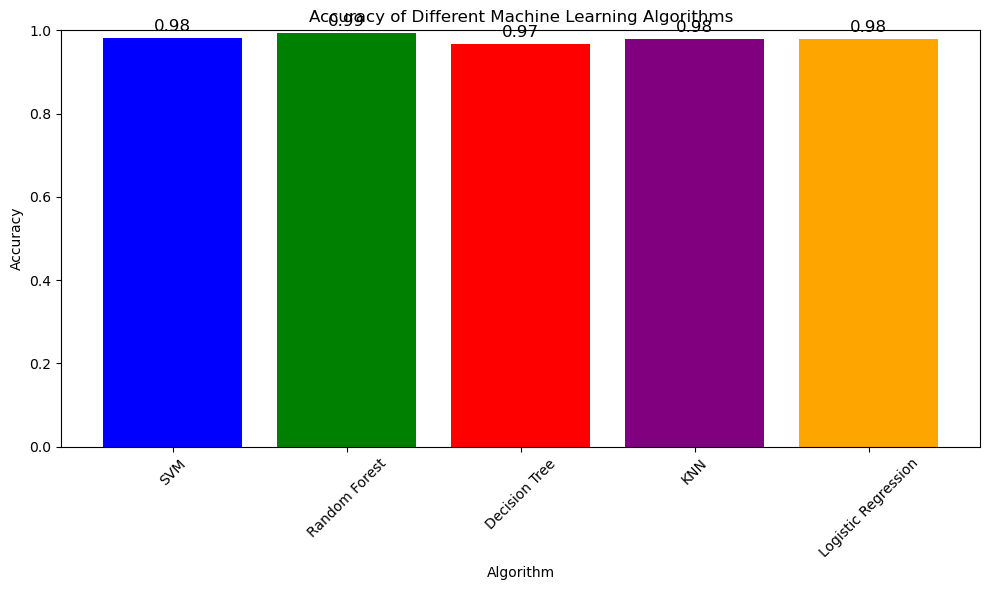

In [218]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_150_ma, accuracy_rf_150_ma, accuracy_dt_150_ma, accuracy_knn_150_ma, accuracy_logistic_150_ma]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 (0% to 100%)
plt.xticks(rotation=45)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


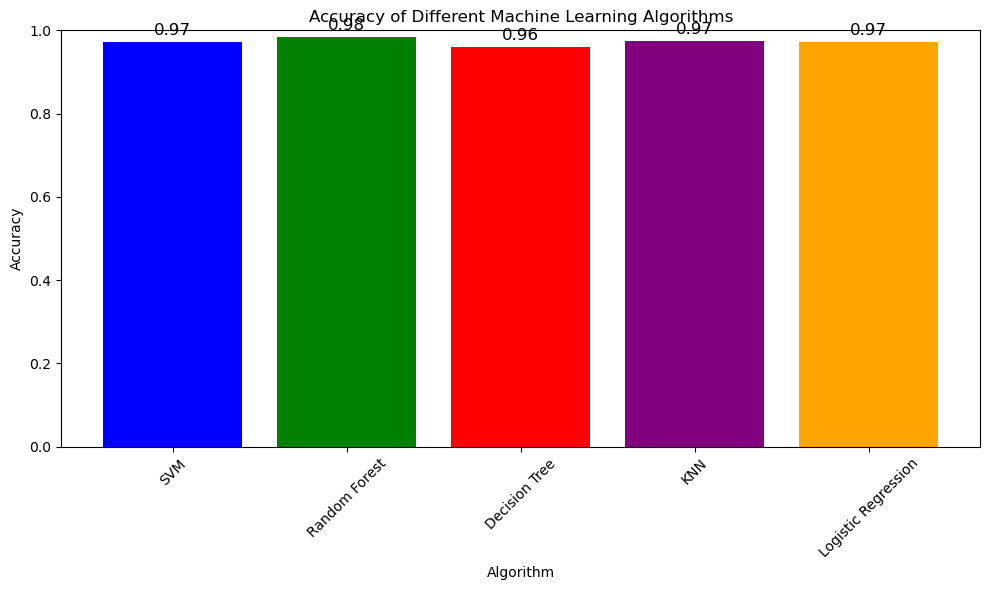

In [219]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_100_ma, accuracy_rf_100_ma, accuracy_dt_100_ma, accuracy_knn_100_ma, accuracy_logistic_100_ma]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45) 

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


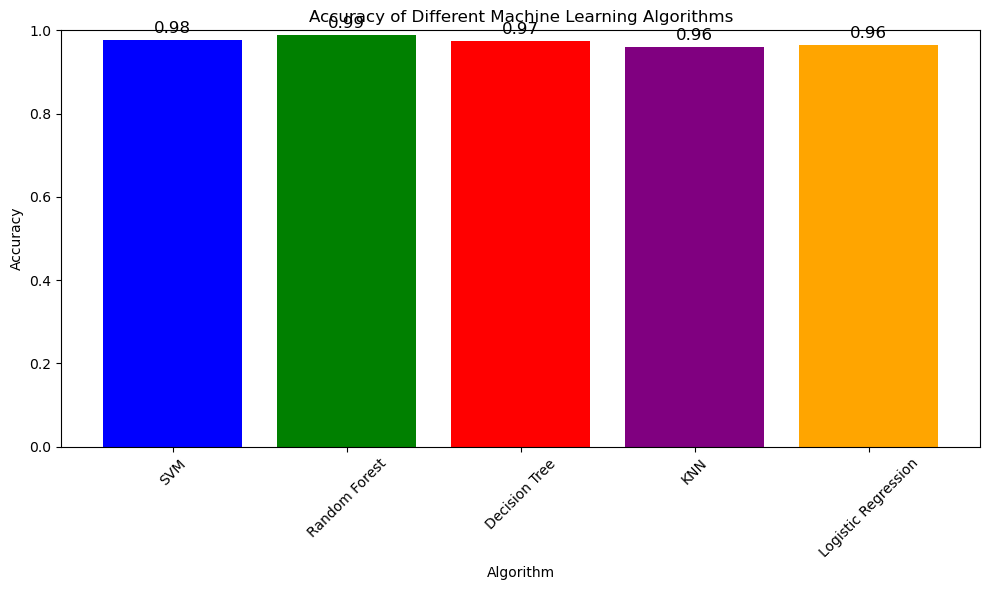

In [220]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_75_ma, accuracy_rf_75_ma, accuracy_dt_75_ma, accuracy_knn_75_ma, accuracy_logistic_75_ma]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


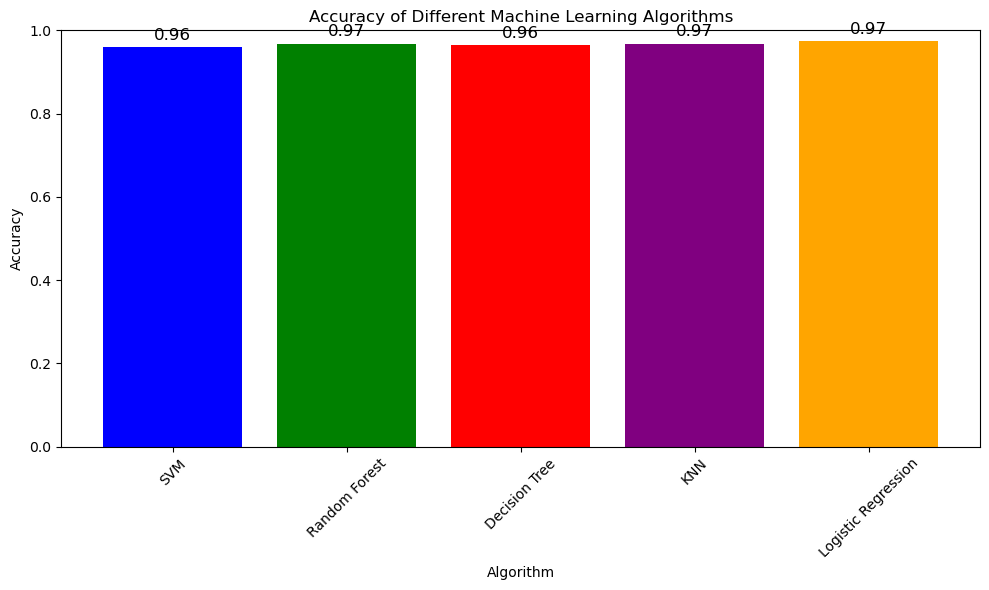

In [221]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm 
accuracies = [accuracy_svm_50_ma, accuracy_rf_50_ma, accuracy_dt_50_ma, accuracy_knn_50_ma, accuracy_logistic_50_ma]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Premission and API calls

In [54]:
import pandas as pd
from sklearn.utils import resample

In [55]:

malgenome_dataset= pd.read_csv('malgenome215dataset1260malware2539benign (1).csv')
malgenome_dataset

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,S
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,S
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,B
3795,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,B
3796,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,B
3797,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,B


In [56]:
apicall_dataset_Permission = [
'READ_SMS',
'WRITE_SMS',
'TelephonyManager.getSubscriberId',
'Ljava.lang.Class.getCanonicalName',
'Ljava.lang.Class.getMethods',
'android.intent.action.BOOT_COMPLETED',
'Ljava.lang.Class.getField',
'READ_PHONE_STATE',
'Landroid.content.Context.unregisterReceiver',
'GET_ACCOUNTS',
'SEND_SMS',
'Landroid.content.Context.registerReceiver',
'getBinder',
'Ljava.lang.Class.cast',
'chmod',
'createSubprocess',
'Ljava.net.URLDecoder',
'WRITE_APN_SETTINGS',
'TelephonyManager.getDeviceId',
'RECEIVE_SMS',
'Ljava.lang.Class.getDeclaredField',
'HttpGet.init',
'Ljava.lang.Class.getPackage',
'abortBroadcast',
'ClassLoader',
'TelephonyManager.getLine1Number',
'getCallingUid',
'USE_CREDENTIALS',
'MANAGE_ACCOUNTS',
'android.telephony.gsm.SmsManager',
'.system.bin',
'Ljava.lang.Class.getMethod',
'RESTART_PACKAGES',
'INSTALL_PACKAGES',
'Ljava.lang.Class.forName',
'TelephonyManager.getSimSerialNumber',
'CAMERA',
'CALL_PHONE',
'android.intent.action.SEND',
'onBind',
'android.content.pm.Signature',
'READ_SYNC_SETTINGS',
'AUTHENTICATE_ACCOUNTS',
'INTERNET',
'PackageInstaller',
'ACCESS_LOCATION_EXTRA_COMMANDS',
'HttpUriRequest',
'remount',
'android.telephony.SmsManager',
'RECEIVE_BOOT_COMPLETED',
'android.intent.action.ACTION_POWER_CONNECTED',
'findClass',
'WRITE_CONTACTS',
'.system.app',
'Ljava.lang.Class.getResource',
'WRITE_SYNC_SETTINGS',
'android.intent.action.TIME_SET',
'android.intent.action.SEND_MULTIPLE',
'ACCESS_WIFI_STATE',
'URLClassLoader',
'BLUETOOTH',
'WAKE_LOCK',
'SYSTEM_ALERT_WINDOW',
'TelephonyManager.getSimCountryIso',
'chown',
'NFC',
'READ_HISTORY_BOOKMARKS',
'HttpPost.init',
'TelephonyManager.getNetworkOperator',
'Ljava.lang.Class.getClasses',
'BIND_REMOTEVIEWS',
'READ_PROFILE',
'READ_CALENDAR',
'CHANGE_WIFI_STATE',
'READ_SYNC_STATS',
'WRITE_HISTORY_BOOKMARKS',
'DISABLE_KEYGUARD',
'READ_LOGS',
'RECORD_AUDIO',
'getCallingPid',
'MODIFY_AUDIO_SETTINGS',
'android.intent.action.PACKAGE_REPLACED',
'android.intent.action.TIMEZONE_CHANGED',
'BROADCAST_STICKY',
'Runtime.exec',
'android.intent.action.PACKAGE_ADDED',
'MOUNT_UNMOUNT_FILESYSTEMS',
'android.intent.action.ACTION_POWER_DISCONNECTED',
'Ljava.lang.Class.getDeclaredClasses',
'android.intent.action.PACKAGE_REMOVED',
'BLUETOOTH_ADMIN',
'android.os.IBinder',
'IBinder',
'WRITE_SECURE_SETTINGS',
'WRITE_SETTINGS',
'Ljavax.crypto.spec.SecretKeySpec',
'android.intent.action.BATTERY_OKAY',
'READ_CONTACTS',
'Binder',
'SUBSCRIBED_FEEDS_READ',
'READ_CALL_LOG',
'SUBSCRIBED_FEEDS_WRITE',
'BATTERY_STATS',
'RECEIVE_WAP_PUSH',
'PathClassLoader',
'KILL_BACKGROUND_PROCESSES',
'ACCESS_COARSE_LOCATION',
'android.intent.action.ACTION_SHUTDOWN',
'Runtime.load',
'transact',
'bindService',
'onServiceConnected',
'ServiceConnection',
'android.os.Binder',
'READ_SMS',
'attachInterface',
'WRITE_SMS',
'TelephonyManager.getSubscriberId',
'Ljava.lang.Class.getCanonicalName',
'Ljava.lang.Class.getMethods',
'android.intent.action.BOOT_COMPLETED',
'Ljava.lang.Class.getField',
'READ_PHONE_STATE',
'Landroid.content.Context.unregisterReceiver',
'GET_ACCOUNTS',
'SEND_SMS',
'Landroid.content.Context.registerReceiver',
'getBinder',
'Ljava.lang.Class.cast',
'chmod',
'createSubprocess',
'Ljava.net.URLDecoder',
'WRITE_APN_SETTINGS',
'TelephonyManager.getDeviceId',
'RECEIVE_SMS',
'Ljava.lang.Class.getDeclaredField',
'HttpGet.init',
'Ljava.lang.Class.getPackage',
'abortBroadcast',
'ClassLoader',
'TelephonyManager.getLine1Number',
'getCallingUid',
'USE_CREDENTIALS',
'MANAGE_ACCOUNTS',
'android.telephony.gsm.SmsManager',
'.system.bin',
'Ljava.lang.Class.getMethod',
'RESTART_PACKAGES',
'INSTALL_PACKAGES',
'Ljava.lang.Class.forName',
'TelephonyManager.getSimSerialNumber',
'CAMERA',
'CALL_PHONE',
'android.intent.action.SEND',
'onBind',
'android.content.pm.Signature',
'READ_SYNC_SETTINGS',
'AUTHENTICATE_ACCOUNTS',
'INTERNET',
'PackageInstaller',
'ACCESS_LOCATION_EXTRA_COMMANDS',
'HttpUriRequest',
'remount',
'android.telephony.SmsManager',
'RECEIVE_BOOT_COMPLETED',
'android.intent.action.ACTION_POWER_CONNECTED',
'findClass',
'WRITE_CONTACTS',
'.system.app',
'Ljava.lang.Class.getResource',
'WRITE_SYNC_SETTINGS',
'android.intent.action.TIME_SET',
'android.intent.action.SEND_MULTIPLE',
'ACCESS_WIFI_STATE',
'URLClassLoader',
'BLUETOOTH',
'WAKE_LOCK',
'SYSTEM_ALERT_WINDOW',
'TelephonyManager.getSimCountryIso',
'chown',
'NFC','class']
apicall_dataset_Permission  =  malgenome_dataset[apicall_dataset_Permission]

print(apicall_dataset_Permission)

      READ_SMS  WRITE_SMS  TelephonyManager.getSubscriberId  \
0            0          0                                 0   
1            1          0                                 1   
2            0          0                                 0   
3            1          1                                 1   
4            1          1                                 1   
...        ...        ...                               ...   
3794         0          0                                 0   
3795         0          0                                 0   
3796         0          0                                 0   
3797         0          0                                 0   
3798         0          0                                 0   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                     0                            0   
1                                     0                            0   
2                          

In [57]:
malware_samples_apicall_dataset_Permission = apicall_dataset_Permission[apicall_dataset_Permission['class'] == 'S']
malware_samples_apicall_dataset_Permission

,READ_SMS,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,android.intent.action.BOOT_COMPLETED,Ljava.lang.Class.getField,READ_PHONE_STATE,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,...,android.intent.action.SEND_MULTIPLE,ACCESS_WIFI_STATE,URLClassLoader,BLUETOOTH,WAKE_LOCK,SYSTEM_ALERT_WINDOW,TelephonyManager.getSimCountryIso,chown,NFC,class
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,S
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,S
4,1,1,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,S
1256,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
1257,1,1,1,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,S
1258,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,S


In [58]:
benign_samples_apicall_dataset_Permission = apicall_dataset_Permission[apicall_dataset_Permission['class'] == 'B']
benign_samples_apicall_dataset_Permission

,READ_SMS,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,android.intent.action.BOOT_COMPLETED,Ljava.lang.Class.getField,READ_PHONE_STATE,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,...,android.intent.action.SEND_MULTIPLE,ACCESS_WIFI_STATE,URLClassLoader,BLUETOOTH,WAKE_LOCK,SYSTEM_ALERT_WINDOW,TelephonyManager.getSimCountryIso,chown,NFC,class
1260,0,0,1,0,1,1,1,1,1,0,...,0,1,0,0,1,0,0,0,0,B
1261,0,0,0,1,1,0,1,1,1,0,...,0,1,0,1,0,0,1,0,0,B
1262,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,B
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1264,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,0,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,B
3795,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,1,0,1,0,0,B
3796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
3797,0,0,0,1,1,0,1,1,1,1,...,0,1,1,0,1,0,1,0,0,B


In [59]:
min_class_size = min(len(malware_samples_apicall_dataset_Permission), len(benign_samples_apicall_dataset_Permission))
min_class_size

1260

In [60]:
malware_samples_resampled_apicall_dataset_Permission = resample(malware_samples_apicall_dataset_Permission, replace=False, n_samples=min_class_size, random_state=42)
benign_samples_resampled_apicall_dataset_Permission = resample(benign_samples_apicall_dataset_Permission, replace=False, n_samples=min_class_size, random_state=42)

In [61]:
df_resampled_apicall_dataset_Permission = pd.concat([malware_samples_resampled_apicall_dataset_Permission, benign_samples_resampled_apicall_dataset_Permission])

In [62]:
# Assuming 'class' is a string column containing 'B' and 'S'

# Replace 'True' with 'B' and 'False' with 'S' in the 'class' column
df_resampled_apicall_dataset_Permission['class'] = df_resampled_apicall_dataset_Permission['class'].replace({True: 'B', False: 'S'})

# Check the data types again
print(df_resampled_apicall_dataset_Permission)


      READ_SMS  WRITE_SMS  TelephonyManager.getSubscriberId  \
76           1          1                                 1   
1026         0          0                                 0   
43           1          1                                 1   
666          1          1                                 1   
529          0          0                                 1   
...        ...        ...                               ...   
2651         0          0                                 1   
2835         0          0                                 0   
2257         0          0                                 0   
2436         0          0                                 0   
2300         0          0                                 0   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
76                                    0                            0   
1026                                  0                            0   
43                         

In [63]:
unique_values = df_resampled_apicall_dataset_Permission['class'].unique()
print(unique_values)

['S' 'B']


In [64]:
print(df_resampled_apicall_dataset_Permission)

      READ_SMS  WRITE_SMS  TelephonyManager.getSubscriberId  \
76           1          1                                 1   
1026         0          0                                 0   
43           1          1                                 1   
666          1          1                                 1   
529          0          0                                 1   
...        ...        ...                               ...   
2651         0          0                                 1   
2835         0          0                                 0   
2257         0          0                                 0   
2436         0          0                                 0   
2300         0          0                                 0   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
76                                    0                            0   
1026                                  0                            0   
43                         

In [65]:

# Drop the "class" column from the DataFrame
df_without_class = df_resampled_apicall_dataset_Permission.drop(columns=['class'])

# Verify that the "class" column is removed
print(df_without_class.head())

      READ_SMS  WRITE_SMS  TelephonyManager.getSubscriberId  \
76           1          1                                 1   
1026         0          0                                 0   
43           1          1                                 1   
666          1          1                                 1   
529          0          0                                 1   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
76                                    0                            0   
1026                                  0                            0   
43                                    0                            0   
666                                   0                            0   
529                                   0                            0   

      android.intent.action.BOOT_COMPLETED  Ljava.lang.Class.getField  \
76                                       1                          0   
1026                                     1

In [66]:
from mlxtend.frequent_patterns import fpgrowth

# Define the minimum support threshold (you can adjust this)
min_support = 0.3

# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(df_without_class, min_support=min_support, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets)

C:\Users\aravi\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


         support                                           itemsets
0       0.909127                                           (Binder)
1       0.907540                                         (INTERNET)
2       0.907540                                         (INTERNET)
3       0.902778                               (android.os.IBinder)
4       0.902778                                          (IBinder)
...          ...                                                ...
352465  0.300397  (Binder, attachInterface, android.os.Binder, a...
352466  0.300397  (Binder, attachInterface, android.os.Binder, t...
352467  0.300397  (attachInterface, android.os.IBinder, android....
352468  0.300397  (Binder, attachInterface, android.os.Binder, a...
352469  0.300397  (Binder, attachInterface, android.os.Binder, a...

[352470 rows x 2 columns]


In [67]:
# 'frequent_itemsets' contains your FP-Growth results
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Select the top 50, 75, 100, and 150 frequent patterns
top_50_patterns = sorted_frequent_itemsets.head(50)
top_75_patterns = sorted_frequent_itemsets.head(75)
top_100_patterns = sorted_frequent_itemsets.head(100)
top_150_patterns = sorted_frequent_itemsets.head(150)


In [68]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


In [69]:
# Sort frequent itemsets by support in descending order
top_combinations = frequent_itemsets.sort_values(by='support', ascending=False).head(150)

# Print the top combinations
print(top_combinations)


      support                                           itemsets
0    0.909127                                           (Binder)
1    0.907540                                         (INTERNET)
62   0.907540                                         (INTERNET)
2    0.907540                                         (INTERNET)
3    0.902778                               (android.os.IBinder)
..        ...                                                ...
203  0.695238  (android.os.IBinder, Binder, READ_PHONE_STATE,...
312  0.695238                        (READ_PHONE_STATE, IBinder)
313  0.695238             (android.os.IBinder, READ_PHONE_STATE)
327  0.695238                (Binder, READ_PHONE_STATE, IBinder)
331  0.695238                (Binder, READ_PHONE_STATE, IBinder)

[150 rows x 2 columns]


In [70]:

# Select the columns related to combinations (exclude the 'class' column)
combination_columns = [col for col in df_resampled_apicall_dataset_Permission.columns if col != 'class']

# Create a new DataFrame for the co-existence dataset
co_existence_dataset = df_resampled_apicall_dataset_Permission[combination_columns]

# Add the 'class' column back to the co-existence dataset if needed
co_existence_dataset['class'] = df_resampled_apicall_dataset_Permission['class']

# Print or save the co-existence dataset
print(co_existence_dataset)

# Now, 'co_existence_dataset' contains the co-existence information of combinations in each app.
# You can further save it to a CSV file or use it for further analysis and model building.


      READ_SMS  READ_SMS  WRITE_SMS  WRITE_SMS  \
76           1         1          1          1   
1026         0         0          0          0   
43           1         1          1          1   
666          1         1          1          1   
529          0         0          0          0   
...        ...       ...        ...        ...   
2651         0         0          0          0   
2835         0         0          0          0   
2257         0         0          0          0   
2436         0         0          0          0   
2300         0         0          0          0   

      TelephonyManager.getSubscriberId  TelephonyManager.getSubscriberId  \
76                                   1                                 1   
1026                                 0                                 0   
43                                   1                                 1   
666                                  1                                 1   
529                

C:\Users\aravi\AppData\Local\Temp\ipykernel_15800\109725903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_existence_dataset['class'] = df_resampled_apicall_dataset_Permission['class']


# SVM

In [71]:
import random

# Define the number of columns to select 
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_150_mpa = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_150_mpa)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (2016, 531) (2016,)
Testing set shape: (504, 531) (504,)
SVM Accuracy: 0.9940476190476191
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99       252
           S       1.00      0.99      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [240]:
import random

# Define the number of columns to select 
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_100_mpa = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_100_mpa)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (2016, 364) (2016,)
Testing set shape: (504, 364) (504,)
SVM Accuracy: 0.9861111111111112
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.98      0.99       252
           S       0.98      0.99      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [241]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_75_mpa = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_75_mpa)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Training set shape: (2016, 255) (2016,)
Testing set shape: (504, 255) (504,)
SVM Accuracy: 0.9781746031746031
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       252
           S       0.98      0.98      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [242]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Proceed with the rest of your code (train-test split, model training, accuracy calculation, etc.)

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm_50_mpa = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm_50_mpa)

# Print a classification report for more detailed metrics
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)



Training set shape: (2016, 182) (2016,)
Testing set shape: (504, 182) (504,)
SVM Accuracy: 0.9841269841269841
SVM Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.99      0.98       252
           S       0.99      0.98      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



# Random forest

In [80]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_150_mpa = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_150_mpa)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)


Training set shape: (2016, 522) (2016,)
Testing set shape: (504, 522) (504,)
Random Forest Accuracy: 0.9940476190476191
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99       252
           S       1.00      0.99      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



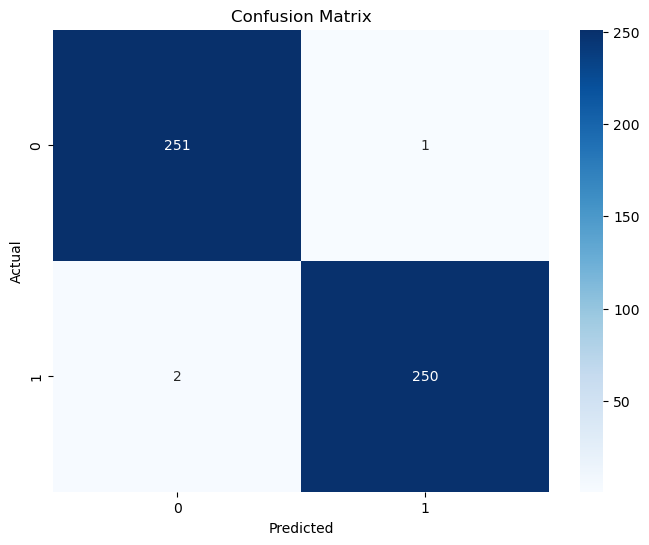

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [244]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_100_mpa = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_100_mpa)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 358) (2016,)
Testing set shape: (504, 358) (504,)
Random Forest Accuracy: 0.9940476190476191
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.99      1.00      0.99       252
           S       1.00      0.99      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [245]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_75_mpa = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_75_mpa)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 261) (2016,)
Testing set shape: (504, 261) (504,)
Random Forest Accuracy: 0.9761904761904762
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       252
           S       0.98      0.98      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [246]:
# import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_50_mpa = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf_50_mpa)

# Print a classification report for more detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)



Training set shape: (2016, 173) (2016,)
Testing set shape: (504, 173) (504,)
Random Forest Accuracy: 0.9821428571428571
Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       252
           S       0.98      0.98      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



# Decision tree

In [247]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_150_mpa = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_150_mpa)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 516) (2016,)
Testing set shape: (504, 516) (504,)
Decision Tree Accuracy: 0.9821428571428571
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.98      0.98       252
           S       0.98      0.99      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [248]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_100_mpa = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_100_mpa)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 343) (2016,)
Testing set shape: (504, 343) (504,)
Decision Tree Accuracy: 0.9662698412698413
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.96      0.97       252
           S       0.96      0.97      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [249]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_75_mpa = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_75_mpa)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 261) (2016,)
Testing set shape: (504, 261) (504,)
Decision Tree Accuracy: 0.9662698412698413
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.96      0.97       252
           S       0.96      0.97      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [250]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt_50_mpa = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt_50_mpa)

# Print a classification report for more detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)



Training set shape: (2016, 182) (2016,)
Testing set shape: (504, 182) (504,)
Decision Tree Accuracy: 0.9623015873015873
Decision Tree Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.95      0.96       252
           S       0.95      0.97      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



# KNN

In [251]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_150_mpa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_150_mpa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 549) (2016,)
Testing set shape: (504, 549) (504,)
KNN Accuracy: 0.9702380952380952
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.96      0.97       252
           S       0.96      0.98      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [252]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_100_mpa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_100_mpa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 367) (2016,)
Testing set shape: (504, 367) (504,)
KNN Accuracy: 0.9742063492063492
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.98      0.97       252
           S       0.98      0.97      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [253]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_75_mpa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_75_mpa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 261) (2016,)
Testing set shape: (504, 261) (504,)
KNN Accuracy: 0.9742063492063492
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.97      0.97       252
           S       0.97      0.98      0.97       252

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



In [254]:
import random

# Define the number of columns to select
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the KNN model
accuracy_knn_50_mpa = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn_50_mpa)

# Print a classification report for more detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)



Training set shape: (2016, 167) (2016,)
Testing set shape: (504, 167) (504,)
KNN Accuracy: 0.9563492063492064
KNN Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.95      0.96       252
           S       0.95      0.96      0.96       252

    accuracy                           0.96       504
   macro avg       0.96      0.96      0.96       504
weighted avg       0.96      0.96      0.96       504



# Logistic regression

In [255]:
import random

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_150_mpa = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_150_mpa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 534) (2016,)
Testing set shape: (504, 534) (504,)
Logistic Regression Accuracy: 0.9920634920634921
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       1.00      0.99      0.99       252
           S       0.99      1.00      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [256]:
import random

# Define the number of columns to select
num_columns_to_select = 100

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_100_mpa = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_100_mpa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 352) (2016,)
Testing set shape: (504, 352) (504,)
Logistic Regression Accuracy: 0.9861111111111112
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.99      0.99       252
           S       0.99      0.98      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



In [257]:
import random

# Define the number of columns to select
num_columns_to_select = 75

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_75_mpa= accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_75_mpa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 267) (2016,)
Testing set shape: (504, 267) (504,)
Logistic Regression Accuracy: 0.9801587301587301
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.98      0.98      0.98       252
           S       0.98      0.98      0.98       252

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



In [258]:
import random

# Define the number of columns to select 
num_columns_to_select = 50

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)


selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_50_mpa = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic_50_mpa)

# Print a classification report for more detailed metrics
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)




Training set shape: (2016, 179) (2016,)
Testing set shape: (504, 179) (504,)
Logistic Regression Accuracy: 0.9424603174603174
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.95      0.94       252
           S       0.95      0.94      0.94       252

    accuracy                           0.94       504
   macro avg       0.94      0.94      0.94       504
weighted avg       0.94      0.94      0.94       504



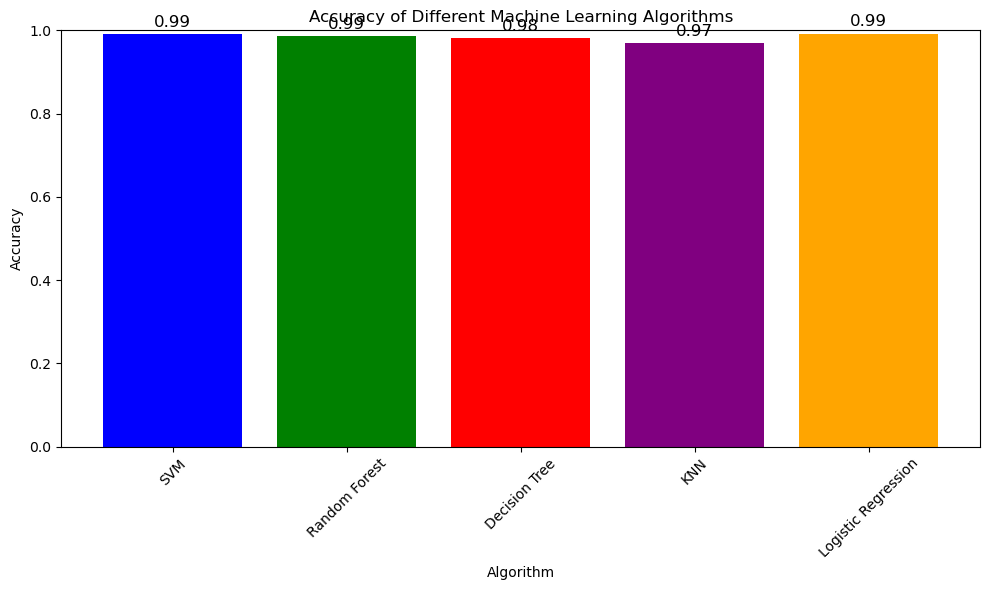

In [259]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_150_mpa, accuracy_rf_150_mpa, accuracy_dt_150_mpa, accuracy_knn_150_mpa, accuracy_logistic_150_mpa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


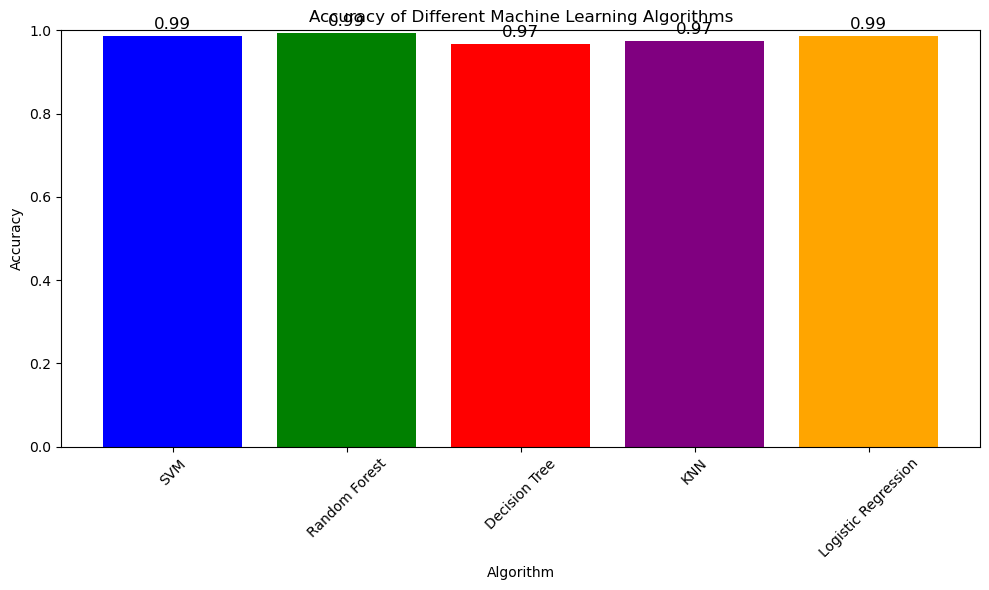

In [260]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_100_mpa, accuracy_rf_100_mpa, accuracy_dt_100_mpa, accuracy_knn_100_mpa, accuracy_logistic_100_mpa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


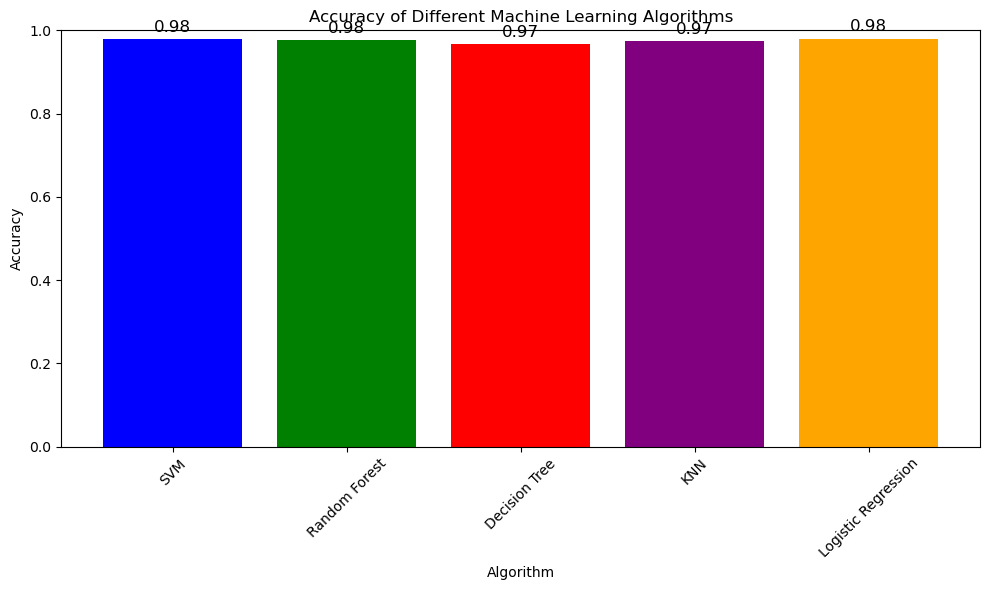

In [261]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_75_mpa, accuracy_rf_75_mpa, accuracy_dt_75_mpa, accuracy_knn_75_mpa, accuracy_logistic_75_mpa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


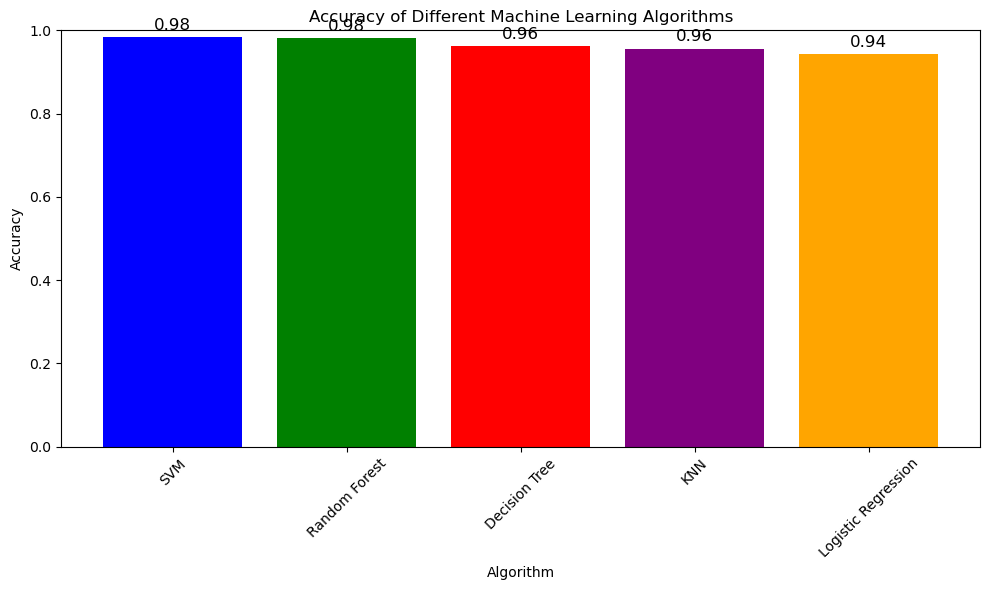

In [262]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
algorithms = ['SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression']

# Define the corresponding accuracies for each algorithm (you should replace these values)
accuracies = [accuracy_svm_50_mpa, accuracy_rf_50_mpa, accuracy_dt_50_mpa, accuracy_knn_50_mpa, accuracy_logistic_50_mpa]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


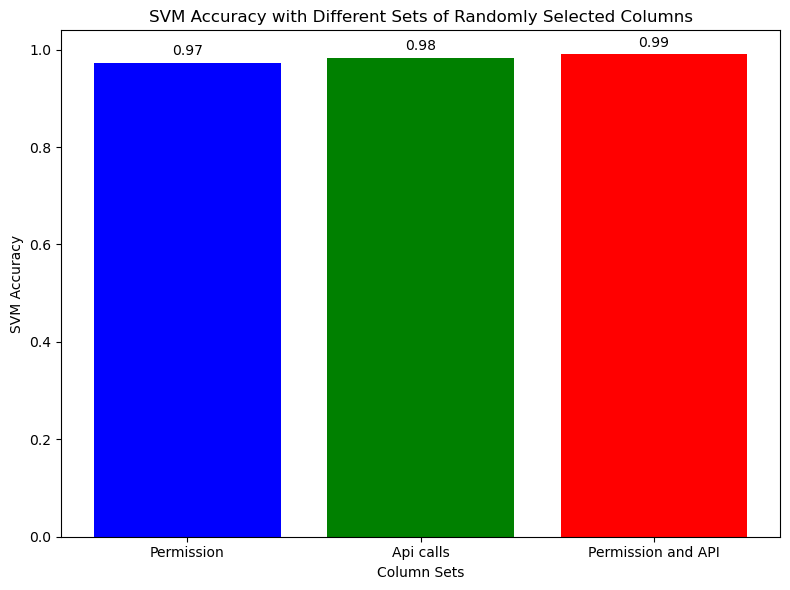

In [263]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_150_mp, accuracy_svm_150_ma, accuracy_svm_150_mpa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


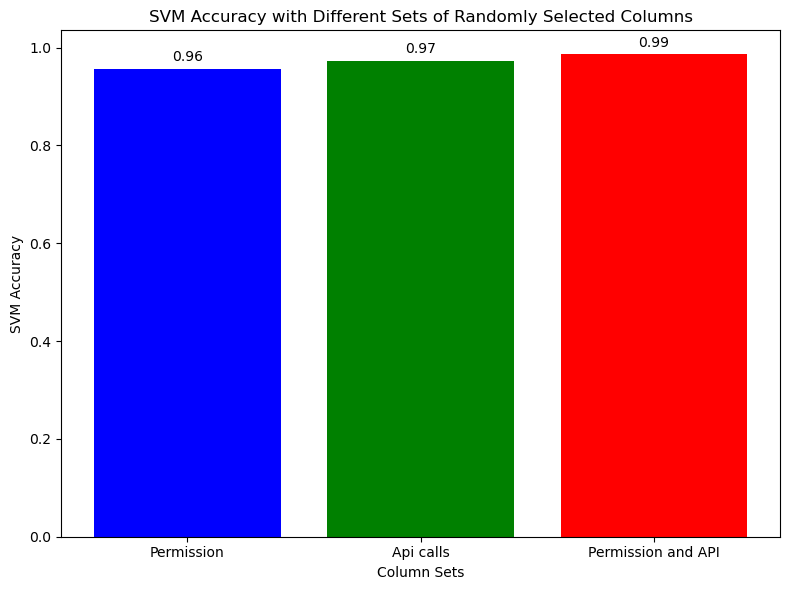

In [264]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_100_mp, accuracy_svm_100_ma, accuracy_svm_100_mpa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


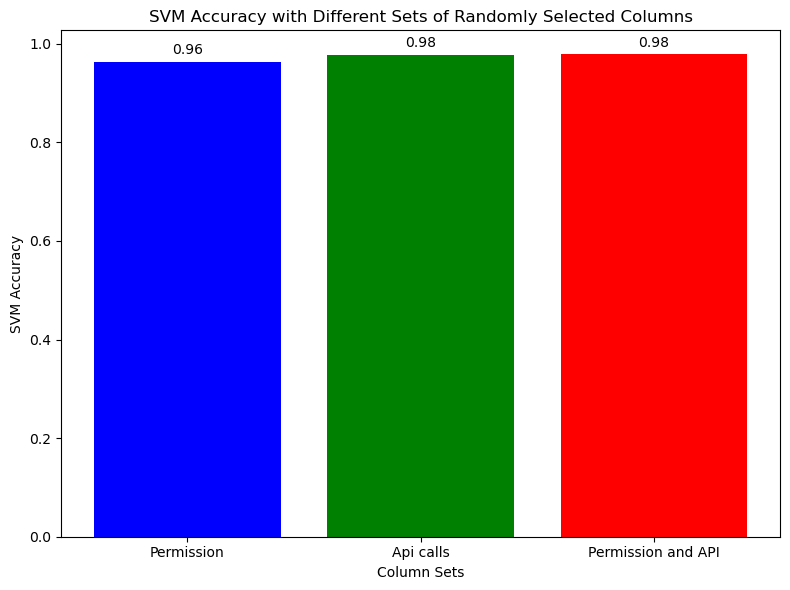

In [265]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_75_mp, accuracy_svm_75_ma, accuracy_svm_75_mpa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


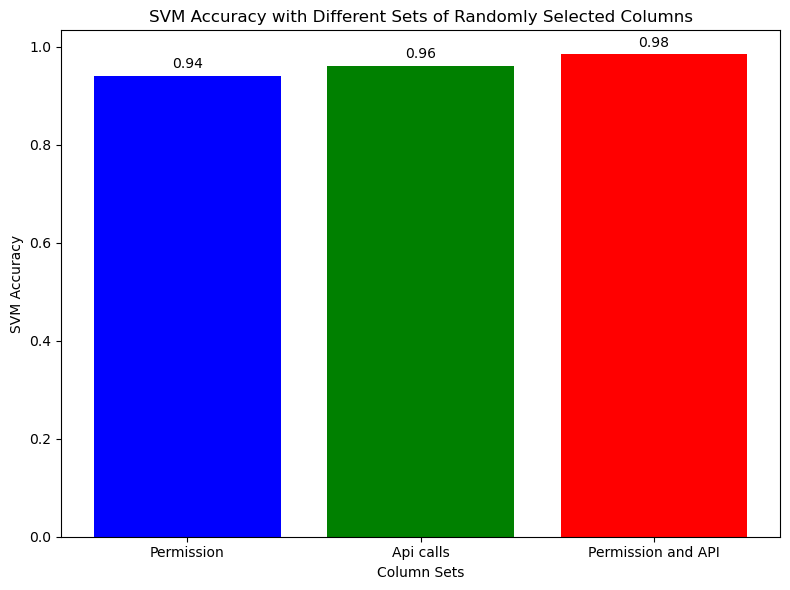

In [266]:
import matplotlib.pyplot as plt

# Define the labels for each set of selected columns
column_set_labels = ['Permission', 'Api calls', 'Permission and API']

# Define the accuracies for each set of selected columns (replace with your accuracy values)
accuracies = [accuracy_svm_50_mp, accuracy_svm_50_ma, accuracy_svm_50_mpa]

# Define different colors for each bar
colors = ['blue', 'green', 'red']  # You can add more colors as needed

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(column_set_labels, accuracies, color=colors)

# Add labels and a title
plt.xlabel('Column Sets')
plt.ylabel('SVM Accuracy')
plt.title('SVM Accuracy with Different Sets of Randomly Selected Columns')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [267]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the number of columns to select
num_columns_to_select = 150

# Get the list of all column names (excluding the 'class' column)
all_columns = co_existence_dataset.columns.tolist()
feature_columns = [col for col in all_columns if col != 'class']

# Randomly shuffle the feature column names
random.shuffle(feature_columns)

# Take the first 150 shuffled columns (including 'class')
selected_columns = ['class'] + feature_columns[:num_columns_to_select]

# Create a new DataFrame with the selected columns
selected_df = co_existence_dataset[selected_columns]

# Split the dataset into features (X) and target (y)
X = selected_df.drop(columns=['class'])
y = selected_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a Random Forest classifier as the base model
base_classifier = RandomForestClassifier(random_state=42)

# Create a BaggingClassifier with the Random Forest as the base estimator
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the testing data using the bagging classifier
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the bagging classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

# Print a classification report for more detailed metrics
report_bagging = classification_report(y_test, y_pred_bagging)
print("Bagging Classifier Classification Report:\n", report_bagging)


Bagging Classifier Accuracy: 0.9880952380952381
Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           B       0.98      1.00      0.99       252
           S       1.00      0.98      0.99       252

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



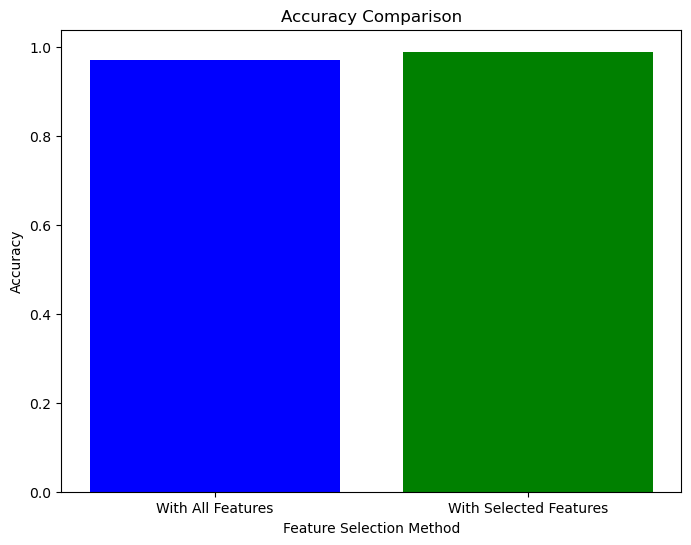

In [268]:
accuracy_scores = [accuracy_rf_150_pa, accuracy_rf_150_mpa]
labels = ['With All Features', 'With Selected Features']
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Feature Selection Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

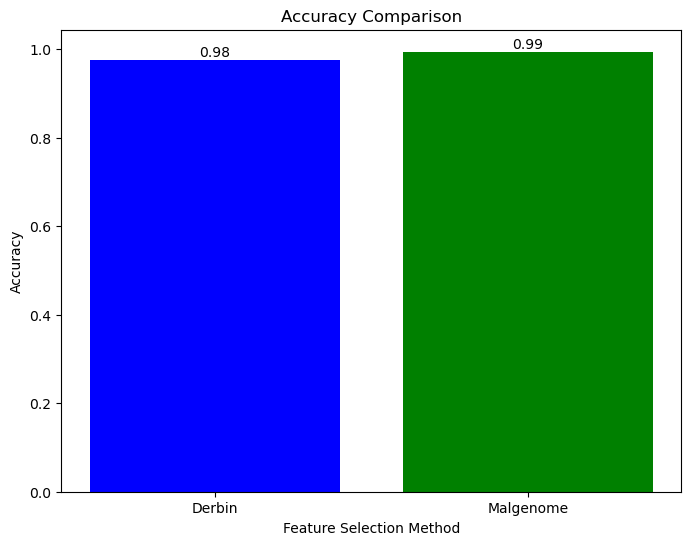

In [83]:
import matplotlib.pyplot as plt

# Your accuracy scores and labels
accuracy_scores = [accuracy_rf_150_pa, accuracy_rf_150_mpa]
labels = ['Derbin', 'Malgenome']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracy_scores, color=['blue', 'green'])

# Annotate the bars with accuracy values
for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Feature Selection Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Show the plot
plt.show()
